# Exercicios do Livro Chapman - Cap 2 Transformadores


# 2.1-Questão

Um transformador de distribuição de 100 kVA, 8000/277 V tem as seguintes resistências e reatâncias:


*   Rp = 5 Ω
*   Xp = 6 Ω
*   Rc = 50 kΩ
*   Rs = 0.005 Ω
*   Xs = 0.006 Ω
*   Xm = 10 kΩ

As impedâncias dadas do ramo de excitação estão referidas ao lado de alta tensão do transformador.

**a-** Encontre o circuito equivalente desse transformador referente ao lado de baixa tensão.

**b-** Encontre o circuito equivalente por unidade desse transformador.

**c-** Assuma que o transformador alimente uma carga nominal em 277 V e FP 0,85 atrasado. Qual é sua tensão de entrada? Qual é sua regulação de tensão?

**d-** Quais são as perdas no cobre e no núcleo desse transformador, nas condições da parte da letra (c)?

**e-** Qual é a eficiência do transformador, nas condições da parte da letra (c)?




In [ ]:
# Fundamentos de Máquinas Elétricas - Transformador
# Resolução do Exercício 2.1 - Livro Chapman 5ª Edição

import cmath
import math

# Função para imprimir fasores
def print_fasor(valor_complexo, nome="Valor"):
    modulo = abs(valor_complexo)
    angulo = math.degrees(cmath.phase(valor_complexo))
    print(f"{nome}: {modulo:.2f} ∠ {angulo:.2f}°")

# Dados do problema
S_base = 100e3       # 100 kVA
Vp_base = 8000       # tensão no primário (alta tensão)
Vs_base = 277        # tensão no secundário (baixa tensão)

Rp = 5               # Ohms
Xp = 6               # Ohms
Rc = 50e3            # Ohms
Rs = 0.005           # Ohms
Xs = 0.006           # Ohms
Xm = 10e3            # Ohms

# Parte (a) - Circuito equivalente no lado de baixa tensão
a = Vp_base / Vs_base   # Relação de transformação

# Impedâncias referidas ao secundário:
Rp_eq = Rp / (a**2)
Xp_eq = Xp / (a**2)
Rc_eq = Rc / (a**2)
Xm_eq = Xm / (a**2)

# Impedância série total (referida ao secundário)
R_eq = Rp_eq + Rs
X_eq = Xp_eq + Xs

print("--- Parte (a): Circuito Equivalente no Lado de Baixa Tensão ---")
print(f"R_eq = {R_eq:.6f} Ohms")
print(f"X_eq = {X_eq:.6f} Ohms")
print(f"Rc_eq = {Rc_eq:.2f} Ohms")
print(f"Xm_eq = {Xm_eq:.2f} Ohms")

# Parte (b) - Circuito equivalente por unidade
Z_base = Vs_base**2 / S_base

R_eq_pu = R_eq / Z_base
X_eq_pu = X_eq / Z_base
Rc_pu = Z_base / Rc_eq
Xm_pu = Z_base / Xm_eq

print("\n--- Parte (b): Circuito Equivalente por Unidade ---")
print(f"R_eq_pu = {R_eq_pu:.6f} pu")
print(f"X_eq_pu = {X_eq_pu:.6f} pu")
print(f"Rc_pu = {Rc_pu:.6f} pu")
print(f"Xm_pu = {Xm_pu:.6f} pu")

# Parte (c) - Tensão de entrada e Regulação de tensão
# Corrente de carga nominal
I_load = S_base / Vs_base   # I linha Para monofásico
fp = 0.85                         # Fator de potência atrasado
phi = math.acos(fp)               # Ângulo de fase

# Corrente como número complexo (defasada para atrasada -> negativo)
I = I_load * (math.cos(phi) - 1j * math.sin(phi))

# Impedância série total
Z_eq = complex(R_eq, X_eq)

# Queda de tensão
V_drop = I * Z_eq

# Tensão no secundário
Vs = complex(Vs_base, 0)

# Tensão de entrada
V_in = Vs + V_drop

# Regulação de tensão
regulacao = (abs(V_in) - abs(Vs)) / abs(Vs) * 100

print("\n--- Parte (c): Tensão de Entrada e Regulação de Tensão ---")
print_fasor(I, "Corrente de carga")
print_fasor(V_drop, "Queda de tensão")
print_fasor(V_in, "Tensão de entrada")
print(f"Regulação de tensão = {regulacao:.2f} %")

# Parte (d) - Perdas no cobre e no núcleo
P_cobre = (abs(I_load)**2) * R_eq    # Perda de cobre total - o "abs" é para calcular apenas o modulo real da corrente
P_nucleo = (abs(V_in)**2) / Rc_eq       # Perda no núcleo, aqui no livro esta errado o solutions, porque ele esta como 50 ohm apenas, mas no caso era para ser igual 60

print("\n--- Parte (d): Perdas no cobre e no núcleo ---")
print(f"Perda no cobre = {P_cobre:.2f} W")
print(f"Perda no núcleo = {P_nucleo:.2f} W")

# Parte (e) - Eficiência
P_saida = S_base * fp
P_entrada = P_saida + P_cobre + P_nucleo

eficiencia = (P_saida / P_entrada) * 100

print("\n--- Parte (e): Eficiência do Transformador ---")
print(f"Eficiência = {eficiencia:.2f} %")



--- Parte (a): Circuito Equivalente no Lado de Baixa Tensão ---
R_eq = 0.010994 Ohms
X_eq = 0.013193 Ohms
Rc_eq = 59.94 Ohms
Xm_eq = 11.99 Ohms

--- Parte (b): Circuito Equivalente por Unidade ---
R_eq_pu = 0.014329 pu
X_eq_pu = 0.017195 pu
Rc_pu = 0.012800 pu
Xm_pu = 0.064000 pu

--- Parte (c): Tensão de Entrada e Regulação de Tensão ---
Corrente de carga: 361.01 ∠ -31.79°
Queda de tensão: 6.20 ∠ 18.41°
Tensão de entrada: 282.89 ∠ 0.40°
Regulação de tensão = 2.13 %

--- Parte (d): Perdas no cobre e no núcleo ---
Perda no cobre = 1432.89 W
Perda no núcleo = 1335.01 W

--- Parte (e): Eficiência do Transformador ---
Eficiência = 96.85 %


# Exercicio 2.2

Um sistema de potência monofásico está mostrado na Figura P2-1. A fonte de potência alimenta um transformador de 100 kVA e 14/2,4 kV por meio de uma impedância de alimentador de (38,2+j140)Ω . A impedância em série equivalente do transformador, referida ao seu lado de baixa tensão, é (0,10+j0,40)Ω. A carga do transformador é 90 kW com FP 0,80 atrasado e 2300 V.

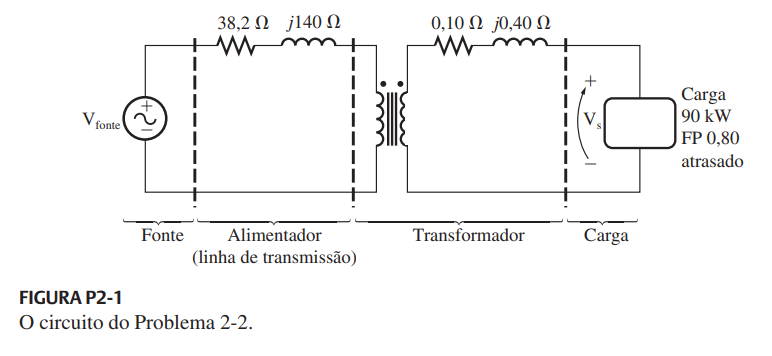

**a-** Qual é a tensão na fonte de potência do sistema?

**b-** Qual é a regulação de tensão do transformador?

**c-** Qual é a eficiência total do sistema de potência?

In [ ]:
import numpy as np

# Dados fornecidos (assumindo relação de transformação do problema 2.1)
V_primario = 14000  # Tensão primária do transformador (lado da linha)
V_secundario = 2400  # Tensão secundária (lado da carga)
a = V_primario / V_secundario  # Relação de transformação

Sbase = 100000 # Potencia nominal do transformador
Zlinha_primario = 38.2 +140j
Zlinha_secundario = 0.10 +0.4j



#As coisas da Carga, quais são as informações dadas
P_nom = 90000 #Potencia ativa da carga nominal
fp = 0.8 # fp atrasado
Vcarga = 2300 # Tensão da Carga

# Calculo da Letra a
# Calcular o Zlinha primario referido ao secundario

Zlinha_prim_ref = (Zlinha_primario)/(a**2)
print(f"Zlinha primário referido ao secundário = ({Zlinha_prim_ref:.2f})")

Is = (P_nom)/(V_secundario*fp) #calculo do modulo
theta_fp = np.arccos(fp) #calculo do fasor
I_s = Is * (np.cos(-theta_fp) + 1j*np.sin(-theta_fp))
print(I_s)
I_modulo = abs(I_s)
I_angulo = np.angle(I_s, deg=True)

# Exibição no formato desejado
print(f"Corrente de Is: ({I_modulo:.2f}) / ∠ {I_angulo:.2f}°")

#Calcular o Vsource referido para secundario

Vsource_ref = V_secundario + (I_s*Zlinha_prim_ref) + (I_s*Zlinha_secundario)

Vsourcem = abs(Vsource_ref)
Vsourcea = np.angle(Vsource_ref, deg=True)
print(f"Tensão de Vsource_ref: ({Vsourcem:.2f}) / ∠ {Vsourcea:.2f}°")

#Tensão na fonte vai ser feito por
Vsource = Vsource_ref*a
Vsourcem2 = abs(Vsource)
Vsourcea2 = np.angle(Vsource, deg=True)
print(f"Tensão de Vsource: ({Vsourcem2:.2f}) / ∠ {Vsourcea2:.2f}°")

# Agora iremos para letra b
V_secundario2 = complex(2400, 0)  # Agora ele é um número complexo

# Transformar I_s e Z_linha_secundario para polar

Z_modulo = np.abs(Zlinha_secundario)
Z_angulo = np.angle(Zlinha_secundario, deg=True)

# Multiplicar módulos e somar ângulos
Isz_modulo = I_modulo * Z_modulo
Isz_angulo = I_angulo + Z_angulo

# Voltar para cartesiano
Isz = Isz_modulo * (np.cos(np.deg2rad(Isz_angulo)) + 1j*np.sin(np.deg2rad(Isz_angulo)))
# Isso foi usado porque aqui nao estava dando certo calcular em coordenada cartesiana, estava com valor muito errado numericamente, diferença de 100 Volts
#Tive que calcular em coordenada polar

Vp_ref = (V_secundario2) + Isz

Vp1 = abs(Vp_ref)
Vp2 = np.angle(Vp_ref, deg=True)
print(f"Tensão de Vsource: ({Vp1:.2f}) / ∠ {Vp2:.2f}°")

#Calculo de regulação de tensão é
vr = ((Vp1-abs(V_secundario2))/(abs(V_secundario2)))*100
print(f"esse é a tensão de regulação em porcetagem =({vr:.2f})")

#Agora é o calculo da letra C
#Precisamos calcular a perdas do transformador

Rreal = 1.12 #calculado antes
Perdas = (I_modulo**2)*Rreal
Pentrada = P_nom + Perdas
print(f"essa é a Pentrada=({Pentrada:.2f}) W")

# a eficiencia
n_ef = (P_nom/Pentrada)*(100)
print(f"logo a eficiencia do transformador é ({n_ef:.2f} %)")

Zlinha primário referido ao secundário = (1.12+4.11j)
(37.5-28.124999999999993j)
Corrente de Is: (46.87) / ∠ -36.87°
Tensão de Vsource_ref: (2576.35) / ∠ 3.00°
Tensão de Vsource: (15028.69) / ∠ 3.00°
Tensão de Vsource: (2415.03) / ∠ 0.29°
esse é a tensão de regulação em porcetagem =(0.63)
essa é a Pentrada=(92460.94) W
logo a eficiencia do transformador é (97.34 %)


# Exercicio 2.3

Considere um sistema de potência simples consistindo em uma fonte ideal de tensão, um transformador elevador ideal, uma linha de transmissão, um transformador abaixador ideal e uma carga. A tensão da fonte é VS = 480∠0°V. A impedância da linha de transmissão é Zlinha= (3 + j4) Ω e a impedância da carga é Zcarga = (30 + j40) Ω.

**a-** Assuma que os transformadores não estão presentes no circuito. Qual é a tensão da carga e a eficiência do sistema?

**b-** Assuma que o transformador 1 é um transformador elevador 1:5 e que o transformador 2 é um transformador abaixador 5:1. Qual é a tensão da carga e a eficiência do sistema ?

**c-** Qual é a relação de espiras necessária para reduzir as perdas na linha de transmissão a 1% da potência total produzida pelo gerador?

In [ ]:
import numpy as np

Vs = 480 +0j
Zlinha = 3 +4j
Zcarga = 30 +40j

Icarga = (Vs)/(Zlinha+Zcarga)
print(" O Icarga = Magnitude: 8.73 Ângulo: -53.13°") #Usei outro google colab meu para transformar coor cart para polar, o exercicio nao pedia, mas eu queria confirmar com calculadora HP
print("o exercicio pede para calcular a tensão de carga e a eficiencia do sistema")
Vcarga = Icarga *Zcarga
print(f"a tensão da carga vai ser ({Vcarga:.2f}) V")
print("Lembrando que a tensão da carga em coordenada polar = Magnitude: 436.36 Ângulo: 0.00°")

Pcarga = (8.73**2)*30  #Preferir fazer o calculo assim, porque antes estava dando erro trocando coordenada real e polar, por isso que vou deixar as info no print
Plinha = (8.73**2)*3 # potencia de linha da transmissao

n = ((Pcarga)/(Pcarga+Plinha))*(100)
print(f"A eficiencia do transformador é ({n:.2f}) %")

#LETRA B

a = 0.2
Zlinharef = (a**2)*(Zlinha)

#Zcarga nao precisa fazer, porque esta no lado dele
#agora o circuito sera
Icargab = (Vs)/(Zlinharef+Zcarga)
print("-------------------------")
print("agora é letra b")
print(f"o zlinharef = ({Zlinharef:.2f})")
print(f"usando a calculadora para transformar em coordenada polar Icarga da letra b = Magnitude: 9.56 Ângulo: -53.13°")

Icarga = (480)/(Zlinharef+Zcarga)
# 📌 Conversão para coordenadas polares
modulo = abs(Icarga)  # Módulo do fasor
angulo = np.angle(Icarga, deg=True)  # Ângulo em graus

# Exibição do resultado em coordenadas polares
print(f"Icarga em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")

Vcargab = (Icarga)*(30+40j) #Icarga da letra B multiplicado com Zcarga

Vc1 = abs(Vcargab)
Vc2 = np.angle(Vcargab, deg=True)
print(f"Tensão de Vcarga da letra b: ({Vc1:.2f}) / ∠ {Vc2:.2f}°") #Solutions deu um angulo de fase diferente, no livro deu 478/3.4°
#Mesmo dando um valor diferente nao interfere com o exercicio
Pcarga2 = (modulo**2)*30 # I da letra b ao quadrado vezes 30
Plinha2 = (8.72**2)*0.12 # O plinha vai ser isso, por que vai pegar a Icarga da letra a * Zlinharef da letra b

n2 = ((Pcarga2)/(Pcarga2+Plinha2))*(100)
print(f"A eficiencia do transformador da letra b é ({n2:.2f}) %")
print("-------------------------")
print("agora é a letra c")

Rlinharef = ((0.01)/(0.99))*30 # para que 99% da resistência total esteja na carga (ou seja, a carga consuma quase toda a potência do sistema e a perda na linha seja mínima),
# a resistência da linha referida ao lado da carga deve ser apenas 1% da resistência total.

# o novo a relação de transformador vai ser
a2 = np.sqrt((Rlinharef)/(Zlinha.real))  # aqui é fazer Rlinha ref = a² * Rlinha , coloquei o Zlinha.real porque só pega a parte real
print(f"a nova relação de transformador vai ser =({a2:.3f})")





 O Icarga = Magnitude: 8.73 Ângulo: -53.13°
o exercicio pede para calcular a tensão de carga e a eficiencia do sistema
a tensão da carga vai ser (436.36+0.00j) V
Lembrando que a tensão da carga em coordenada polar = Magnitude: 436.36 Ângulo: 0.00°
A eficiencia do transformador é (90.91) %
-------------------------
agora é letra b
o zlinharef = (0.12+0.16j)
usando a calculadora para transformar em coordenada polar Icarga da letra b = Magnitude: 9.56 Ângulo: -53.13°
Icarga em coordenada polar: (9.56) / ∠ -53.13°
Tensão de Vcarga da letra b: (478.09) / ∠ 0.00°
A eficiencia do transformador da letra b é (99.67) %
-------------------------
agora é a letra c
a nova relação de transformador vai ser =(0.318)


# Exercicio 2.4

O enrolamento secundário de um transformador real tem uma tensão de terminal de
vs(t)= 282,8 * sen(377t) V. A relação de espiras do transformador é 100:200 (a = 0,50). Se a corrente do secundário no transformador for is(t)= 7,07 * sen(377t=36,87°) A, qual será a corrente do primário desse transformador? Quais são sua regulação de tensão e sua eficiência? As impedâncias do transformador,referidas ao lado do primário, são :



*   Req = 0.20 Ω
*   Xeq = 0.80 Ω
*   Rc = 300 Ω
*   Xm = 100 Ω



In [ ]:
print("Exercicio 2.4")
import numpy as np
Vs = ((282.8)/(np.sqrt(2))) # Tem que converter para o valor RMS, o vs(t) trabalha com o valor maximo de amplitude.
Is =  ((7.07)/(np.sqrt(2)))
Is_mag = 5
Req = 0.20
Xeq = 0.80j
Zeq = Req + Xeq
Rc = 300
Xm = 100j # aqui foi o erro, esquecer de adicionar o j

#Fazendo a relação de espiras com o
a = 0.5
Vsref= a*Vs
theta = -36.87 # o exercicio da
Isref_Modulo = Is_mag/a
Isref_Angulo = theta  # Ângulo em graus
print(f"Isref: ({Isref_Modulo:.2f}) / ∠ {Isref_Angulo:.2f}°")
Isref_coordC = 8.00-6.00j # Fiz isso no meu github de conversão de coordenadas para fazer o proximo passo

Vp = Vsref + (Isref_coordC*Zeq) # Aqui acha o Vp Tensão primaria

Vp_mag = 106.51 # feito pelo conversao de coordenadas
Vp_ang = 2.8
# Calculo de Iex = Ic + Im , é a corrente que passa no meio do circuito
Ic = Vp/Rc
Im = Vp/Xm
Iex = Ic+Im
print(Iex)
# 📌 Conversão para coordenadas polares
modulo = abs(Iex)  # Módulo do fasor
angulo = np.angle(Iex, deg=True)  # Ângulo em graus

# Exibição do resultado em coordenadas polares
print(f"Iex em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")


Ip = Isref_coordC + Iex
# 📌 Conversão para coordenadas polares
modulo = abs(Ip)  # Módulo do fasor
angulo = np.angle(Ip, deg=True)  # Ângulo em graus

# Exibição do resultado em coordenadas polares
print(f"Ip em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")

print("---------------------")
Vreg = (((Vp_mag)-((a*Vs)))/(a*Vs))*100
print(f"logo a regulação de tensão é igual ({Vreg:.2f}%)")
print("--------------------")
Ip_ang = -39.77
Ip_mag = 10.97
thetanovo = Vp_ang - Ip_ang #
thetarad = np.radians(thetanovo)
Pentrada2 = Vp_mag*Ip_mag*np.cos(thetarad)
theta2 = 36.87
theta2rad = np.radians(theta2)
Psaida2 = Vs*Is_mag*np.cos(theta2rad)

n2 = ((Psaida2)/(Pentrada2))*(100)
print(f"A eficiencia do transformador da letra b é ({n2:.2f}) %") # foi corrigido, o erro era falta do j em Xm



Exercicio 2.4
Isref: (10.00) / ∠ -36.87°
(0.40661632953259275-1.0465156552644448j)
Iex em coordenada polar: (1.12) / ∠ -68.77°
Ip em coordenada polar: (10.97) / ∠ -39.97°
---------------------
logo a regulação de tensão é igual (6.53%)
--------------------
A eficiencia do transformador da letra b é (92.96) %


# Exercicio 2.5

Quando viajantes dos Estados Unidos e do Canadá visitam a Europa, eles encontram
um sistema diferente de distribuição de energia elétrica. A tensão eficaz das tomadas na América do Norte é 120 V em 60 Hz, ao passo que as tomadas típicas na Europa são 230 V em 50 Hz. Muitos viajantes levam consigo pequenos transformadores elevadores/abaixadores, de modo que eles podem utilizar seus aparelhos elétricos nos países que estão visitando. Um transformador típico pode ter valores nominais de 1 kVA e 115/230 V, com 500 espiras no lado de 115 V e 1000 espiras no lado de 230 V. A curva de magnetização desse transformador está mostrada na Figura P2-2 e pode ser encontrada no arquivo p22.mag no site deste livro.

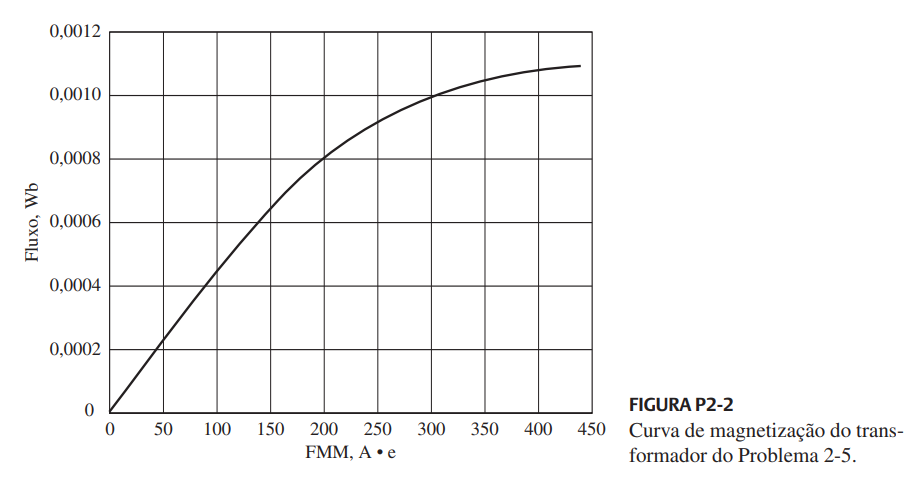

**a-** Suponha que esse transformador seja ligado a uma fonte de potência de 120 V e 60 Hz sem nenhuma carga ligada no lado de 240 V. Faça um gráfico da corrente de magnetização que irá circular no transformador. (Se estiver disponível, use MATLAB para plotar a corrente com exatidão.) Qual é amplitude eficaz da corrente de magnetização? Que porcentagem da corrente de plena carga é a corrente de magnetização?

**b-** Agora, suponha que esse transformador seja ligado a uma fonte de potência de 240 V e 50 Hz sem nenhuma carga ligada no lado de 120 V. Faça um gráfico da corrente de magnetização que irá circular no transformador. (Se estiver disponível, use MATLAB para plotar a corrente com exatidão.) Qual é amplitude eficaz da corrente de magnetização? Que porcentagem da corrente de plena carga é a corrente de magnetização?

**c-** Em qual caso a corrente de magnetização é uma porcentagem maior da corrente de plena carga? Por quê?

In [ ]:
#Esse exercicio nao fiz porque preciso do arquivo do matlab, talvez tento achar ele depois.
#vou dar prioridades a outros


# Exercicio 2.6

Um transformador com especificações nominais de 1000 VA e 230/115 V foi submetido a ensaios para determinar seu circuito equivalente. Os resultados dos ensaios estão mostrados abaixo.

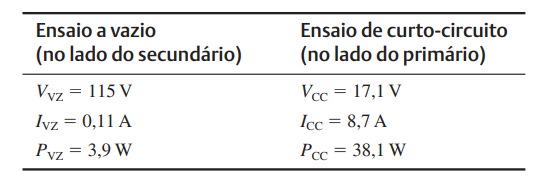

**a-** Encontre o circuito equivalente desse transformador, referido ao lado de baixa tensão do transformador.

**b-** Encontre a regulação de tensão do transformador, em condições nominais com (1) FP 0,8 atrasado, (2) FP 1,0 e (3) FP 0,8 adiantado.

**c-** Determine a eficiência do transformador, em condições nominais com FP 0,8 atrasado.


In [ ]:
import numpy as np

S = 1000
Vp = 230
Vs = 115
a = Vp/Vs
#-----------Dados do Ensaio Vazio-------------
Vvz = 115
Ivz = 0.11
Pvz = 3.9
#-----------Dados do Ensaio Curto-Circuito------
Vcc = 17.1
Icc = 8.7
Pcc = 38.1
#-----------------------------------------------
print("----------------------------------------------")
print("agora é usar os dados do ensaio vazio")

print("resolvendo a letra a, achar o circuito equivalente para o lado de baixa tensão")
Yex = Ivz/Vvz
print("Yex = ",Yex)
fp = (Pvz)/((Vvz)*(Ivz))

angulo_radianos = np.arccos(fp)  # Retorna em radianos
angulo_graus = np.degrees(angulo_radianos)  # Converte para graus
print(f"o Yex em coordenada polar é ({Yex:.6f}∠{angulo_graus:.2f})")
Yex_real = abs(Yex) * np.cos(angulo_radianos)  # Parte real
Yex_imag = abs(Yex) * np.sin(angulo_radianos)  # Parte imaginária
Yex_cartesiano = complex(Yex_real, Yex_imag)  # Forma complexa
# Exibir coordenada cartesiana
print(f"Yex em coordenada cartesiana: {Yex_real:.6f} + {Yex_imag:.6f}j")
print("agora com a coordenada cartesiana da para calcular o Rc e Xm")
Rc = 1/Yex_real
print(f"essa é o valor de Rc =({Rc:.2f}) ohm")
Xm = 1/Yex_imag
print(f"essa é o valor de Xm =({Xm:.2f}) ohm")
print("----------------------------------------------")
print("agora é usar os dados do ensaio de curto-circuito")
Zeq = Vcc/Icc
print(f"Zeq = {Zeq:.2f} ohm")

fp2 = (Pcc)/((Vcc)*(Icc))

angulo_radianos2 = np.arccos(fp2)  # Retorna em radianos
angulo_graus2 = np.degrees(angulo_radianos2)  # Converte para graus
print(f"o Zeq em coordenada polar é ({Zeq:.3f}∠{angulo_graus2:.2f})")
Zeq_real = abs(Zeq) * np.cos(angulo_radianos2)  # Parte real
Zeq_imag = abs(Zeq) * np.sin(angulo_radianos2)  # Parte imaginária
Zeq_cartesiano = complex(Zeq_real, Zeq_imag)  # Forma complexa

print(f"Zeq em coordenada cartesiana: Req:{Zeq_real:.3f} ohm  e Xeq:{Zeq_imag:.3f}j ohm")
print("Tem que converter o circuito para ser referido para lado secundario ( só o Req e Xeq, o Rc e Xm pode manter)")

Req = (Zeq_real)/(a**2)
print(f"a Req referido ao secundario = ({Req:.3f})")
Xeq = (Zeq_imag)/(a**2)
print(f"a Xeq referido ao secundario = ({Xeq:.3f})")
print("----------------------------------------------")
print("letra b")
Zeqref = (Req)+(Xeq*1j) #Tomar cuidado para nao esquecer disso
Is = S/Vs # isso é modulo
Is_modulo = Is
fp11 = 0.8
angulo_radianos11 = -np.arccos(fp11)  # Retorna em radianos
angulo_graus11 = np.degrees(angulo_radianos11)  # Converte para graus
print(f"o Is em coordenada polar é ({Is:.3f}∠{angulo_graus11:.2f})")
Is_real11 = abs(Is) * np.cos(angulo_radianos11)  # Parte real
Is_imag11 = abs(Is) * np.sin(angulo_radianos11)  # Parte imaginária
Is_cartesiano11 = complex(Is_real11, Is_imag11)  # Forma complexa
print("Calcular o Vp referido ao secundario")
Vpref11 = Vs + ((Zeqref)*(Is_cartesiano11))
modulov = abs(Vpref11)  # Módulo
angulov = np.angle(Vpref11, deg=True)  # Ângulo em graus

# Exibição do resultado em coordenadas polares
print(f"Forma polar de Vpref: ({modulov:.2f}) / ∠ {angulov:.2f}°")

print("calcular a regulação de tensao")
Vrreg11 = ((modulov-Vs)/(Vs))*100
print(f"a regulação de tensão deste FP vai ser = ({Vrreg11:.2f})%")

print("---------------------------------")
#Agora é resolver para o FP unitario, só o angulo da corrente que vai alterar
#Zeqref Vs Is_modulo=Isfica igual
fp22 = 1
angulo_radianos22 = np.arccos(fp22)  # Retorna em radianos
angulo_graus22 = np.degrees(angulo_radianos22)  # Converte para graus
print(f"o Is (FP=1) em coordenada polar é ({Is:.3f}∠{angulo_graus22:.2f})")
Is_real22 = abs(Is) * np.cos(angulo_radianos22)  # Parte real
Is_imag22 = abs(Is) * np.sin(angulo_radianos22)  # Parte imaginária
Is_cartesiano22 = complex(Is_real22, Is_imag22)  # Forma complexa
#-------------------------------------------------------------------

print("Calcular o Vp(FP=1) referido ao secundario")
Vpref22 = Vs + ((Zeqref)*(Is_cartesiano22))
modulov2 = abs(Vpref22)  # Módulo
angulov2 = np.angle(Vpref22, deg=True)  # Ângulo em graus

# Exibição do resultado em coordenadas polares
print(f"Forma polar de Vpref(FP=1): ({modulov2:.2f}) / ∠ {angulov2:.2f}°")
print("calcular a regulação de tensao")
Vrreg22 = ((modulov2-Vs)/(Vs))*100
print(f"a regulação de tensão deste FP=1 vai ser = ({Vrreg22:.2f})%")
print("------------------------------------------------------------------")

#Agora é resolver para o FP 0.8 adiantado , só o angulo da corrente que vai alterar
#Zeqref Vs Is_modulo=Isfica igual
fp33 = 0.8
angulo_radianos33 = np.arccos(fp33)  # Retorna em radianos
angulo_graus33 = np.degrees(angulo_radianos33)  # Converte para graus
print(f"o Is (FP=0,8 adiantado) em coordenada polar é ({Is:.3f}∠{angulo_graus33:.2f})")
Is_real33 = abs(Is) * np.cos(angulo_radianos33)  # Parte real
Is_imag33 = abs(Is) * np.sin(angulo_radianos33)  # Parte imaginária
Is_cartesiano33 = complex(Is_real33, Is_imag33)  # Forma complexa
#-------------------------------------------------------------------

print("Calcular o Vp(FP=1) referido ao secundario")
Vpref33 = Vs + ((Zeqref)*(Is_cartesiano33))
modulov3 = abs(Vpref33)  # Módulo
angulov3 = np.angle(Vpref33, deg=True)  # Ângulo em graus

# Exibição do resultado em coordenadas polares
print(f"Forma polar de Vpref(FP=0.8 adiantado): ({modulov3:.2f}) / ∠ {angulov3:.2f}°")
print("calcular a regulação de tensao")
Vrreg33 = ((modulov3-Vs)/(Vs))*100
print(f"a regulação de tensão deste FP=0,8 adiantado vai ser = ({Vrreg33:.2f})%")
print("------------------------------------------------------------------")
print("agora é a letra c")
Psaida = Vs*Is*fp
Perdas_cobre = (Is**2)*Req
Perdas_nucleo = (modulov**2)/(Rc) # esse modulov é o Vp referido ao lado de baixa tensão calculado na letra b, que é 118 V

Pentrada = Psaida + Perdas_cobre + Perdas_nucleo
eficiencia = ((Psaida)/(Pentrada))*(100)
print(f"a eficiencia deste transformador vai ser igual a = ({eficiencia:.2f}%)")


----------------------------------------------
agora é usar os dados do ensaio vazio
resolvendo a letra a, achar o circuito equivalente para o lado de baixa tensão
Yex =  0.0009565217391304348
o Yex em coordenada polar é (0.000957∠72.04)
Yex em coordenada cartesiana: 0.000295 + 0.000910j
agora com a coordenada cartesiana da para calcular o Rc e Xm
essa é o valor de Rc =(3391.03) ohm
essa é o valor de Xm =(1098.99) ohm
----------------------------------------------
agora é usar os dados do ensaio de curto-circuito
Zeq = 1.97 ohm
o Zeq em coordenada polar é (1.966∠75.16)
Zeq em coordenada cartesiana: Req:0.503 ohm  e Xeq:1.900j ohm
Tem que converter o circuito para ser referido para lado secundario ( só o Req e Xeq, o Rc e Xm pode manter)
a Req referido ao secundario = (0.126)
a Xeq referido ao secundario = (0.475)
----------------------------------------------
letra b
o Is em coordenada polar é (8.696∠-36.87)
Calcular o Vp referido ao secundario
Forma polar de Vpref: (118.38) / ∠ 1.28°


# Exercicio 2.7

Um transformador de distribuição de 30 kVA e 8000/230 V tem uma impedância referida ao primário de (20 + j100)Ω. As componentes do ramo de excitação, referidas ao lado primário, são RC = 100 kΩ  e XM = 20 kΩ.

**a-** Se a tensão do primário for 7.967 V e impedância de carga for ZL=(2,0 + j0,7)Ω, qual será a tensão do secundário do transformador? Qual é a regulação de tensão do transformador?

**b-** Se a carga for desconectada e um capacitor de -j3,0Ω for ligado em seu lugar, qual será a tensão no secundário do transformador? Qual é a regulação de tensão nessas condições?



In [ ]:
import numpy as np

S = 30000
Vp = 8000
Vs = 230
a = Vp/Vs
print("letra a -> pede para calcular a tensão do secundario, sabendo que a tensão do primario vai ser 7967 V e com uma impendancia de carga de Zl=(2,0 + j0,7)Ω")
Zl= 2+0.7j
Zlref = (a**2)*(Zl) #zl referido ao lado primario, o motivo disso é porque ja sabemos o valor do Vp de 7967 Volts
print(f"o zl referido ao lado primario é -> ({Zlref:.2f})Ω")
Req = 20
Xeq = 100
Zeqref = (Req)+(Xeq*1j) #Tem que multiplicar o Xeq por j, lembrete
print(f"o Zeq referido ao lado primario( o exercicio ja deu este valor) é -> ({Zeqref:.2f})Ω")
Vp_letraA = complex(7967,0)
print("Precisamos calcular o Is referido ao lado primario sendo que é Vp/(Zeqref + Zlref)")
Isref = (Vp_letraA)/(Zlref+Zeqref)
print(f"o Isref referido ao lado primario é -> ({Isref:.2f})A")
#converter para coordenada polar
modulo = abs(Isref)  # Módulo do fasor
angulo = np.angle(Isref, deg=True)  # Ângulo em graus

# Exibição do resultado em coordenadas polares
print(f"Isref em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")
print("Agora é calcular o Vs referido ao primario e depois calcular o Vs verdadeiro")
Vsref = Isref * Zlref
modulo1 = abs(Vsref)  # Módulo do fasor
angulo = np.angle(Vsref, deg=True)  # Ângulo em graus
print(f"Vsref em coordenada polar: ({modulo1:.2f}) / ∠ {angulo:.2f}°")
Vs_verdadeiro = (Vsref)/(a)
modulo = abs(Vs_verdadeiro)  # Módulo do fasor
angulo = np.angle(Vs_verdadeiro, deg=True)  # Ângulo em graus
print(f"Vs_verdadeiro em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")
print("o Calculo da regulação de tensão vai ser feito")

Vrreg = ((7967-modulo1)/(modulo1))*100 # esse modulo1 é o Vs ref só a parte real dele
print(f"a regulação de tensão deste transformador vai ser = ({Vrreg:.2f})%")
print("---------------------------------------------------------------------------------------------------------------------------------")
print("letra b -> Procurar uma tensão no secundario sendo que foi ligado um capacitor")
Zcap = -3j
Zlinharef = (a**2)*(Zcap)
print(f"o Zlinharef referido ao lado primario é -> ({Zlinharef:.2f})Ω")
Isref = (Vp_letraA)/(Zlinharef+Zeqref)  #apenas o Zlinha mudou
print(f"o Isref referido ao lado primario é -> ({Isref:.2f})A")
#converter para coordenada polar
modulo = abs(Isref)  # Módulo do fasor
angulo = np.angle(Isref, deg=True)  # Ângulo em graus

# Exibição do resultado em coordenadas polares
print(f"Isref em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")
print("Agora é calcular o Vs referido ao primario e depois calcular o Vs verdadeiro")

Vsref = Isref * Zlinharef #z linha mudou aqui
modulo2 = abs(Vsref)  # Módulo do fasor
angulo = np.angle(Vsref, deg=True)  # Ângulo em graus
print(f"Vsref em coordenada polar: ({modulo2:.2f}) / ∠ {angulo:.2f}°")
Vs_verdadeiro = (Vsref)/(a)
modulo = abs(Vs_verdadeiro)  # Módulo do fasor
angulo = np.angle(Vs_verdadeiro, deg=True)  # Ângulo em graus
print(f"Vs_verdadeiro em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")
print("o Calculo da regulação de tensão vai ser feito")

Vrreg = ((7967-modulo2)/(modulo2))*100 # esse modulo1 é o Vs ref só a parte real dele
print(f"a regulação de tensão deste transformador vai ser = ({Vrreg:.2f})%")
print("No solutions o Vs ref dele estava 8194 igual aqui e na hora de calcular a tensão de regulação ficou como 8914 V, acredito que é um erro do livro")



letra a -> pede para calcular a tensão do secundario, sabendo que a tensão do primario vai ser 7967 V e com uma impendancia de carga de Zl=(2,0 + j0,7)Ω
o zl referido ao lado primario é -> (2419.66+846.88j)Ω
o Zeq referido ao lado primario( o exercicio ja deu este valor) é -> (20.00+100.00j)Ω
Precisamos calcular o Is referido ao lado primario sendo que é Vp/(Zeqref + Zlref)
o Isref referido ao lado primario é -> (2.84-1.10j)A
Isref em coordenada polar: (3.04) / ∠ -21.21°
Agora é calcular o Vs referido ao primario e depois calcular o Vs verdadeiro
Vsref em coordenada polar: (7804.48) / ∠ -1.92°
Vs_verdadeiro em coordenada polar: (224.38) / ∠ -1.92°
o Calculo da regulação de tensão vai ser feito
a regulação de tensão deste transformador vai ser = (2.08)%
---------------------------------------------------------------------------------------------------------------------------------
letra b -> Procurar uma tensão no secundario sendo que foi ligado um capacitor
o Zlinharef referido ao lado

# Exercicio 2.8

Um transformador monofásico de 150 MVA e 15/200 kV tem uma resistência por unidade de 1,2% e uma reatância por unidade de 5% (dados tomados da placa do transformador). A impedância de magnetização é j80 por unidade.

**a-** Encontre o circuito equivalente, referido ao lado de baixa tensão desse transformador.

**b-** Calcule a regulação de tensão do transformador, para uma corrente de plena carga com um fator de potência de 0,8 atrasado.

**c-** Calcule as perdas no cobre e no núcleo do transformador nas condições de (b)

**d-** Assuma que a tensão do primário desse transformador é constante de 15 kV. Plote a tensão do secundário como uma função da corrente de carga para correntes desde a vazio até plena carga. Repita esse processo para fatores de potência de 0,8 atrasado, 1,0 e 0,8 adiantado.

Este exercicio vamos resolver na unidade pu
esse é o Zbase = (1.50)ohm 
a letra a pede para a gente voltar para unidade real e descobrir os valores das resistencias
as resistencias vai ser Zeq=(0.018+0.075j ohm) e o Xm=(0.00+120.00j) ; um lembrete o Rc nao foi especificado
-------------------------------------------------------------
calcular a letra b , pede para achar a regulação de tensão para uma carga plena com FP de 0,8 atrasado
Isref em coordenada polar: (12500.00) / ∠ -36.87°
Isref em coordenada cartesiana: 10000.00 + -7500.00j
Vs_verdadeiro em coordenada polar: (15754.51) / ∠ 2.24°
a regulação de tensão deste transformador vai ser = (5.03)%
Perdas no cobre: 2812500.00 W
Perdas no núcleo (aproximadas): 1500000.00 W


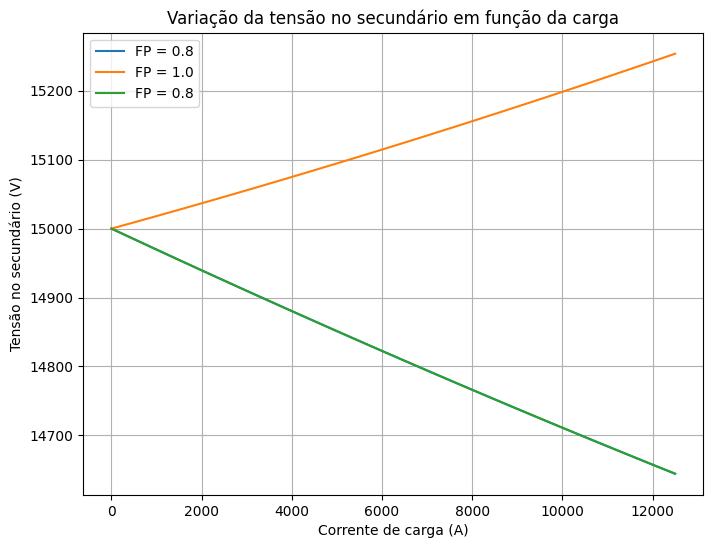

In [ ]:
import numpy as np

Sbase = 150000000
Vpbase = 15000
Vs = 200000
print("Este exercicio vamos resolver na unidade pu")
Zbase = (Vpbase**2)/(Sbase)
print(f"esse é o Zbase = ({Zbase:.2f})ohm ")
print("a letra a pede para a gente voltar para unidade real e descobrir os valores das resistencias")
Req = 0.012*Zbase
Xeq = 0.05*Zbase
Zeq = (Req)+(Xeq*1j) #Tem que multiplicar o Xeq por j, lembrete
Xm = (80*1j)*(Zbase)
print(f"as resistencias vai ser Zeq=({Zeq:.3f} ohm) e o Xm=({Xm:.2f}) ; um lembrete o Rc nao foi especificado")
print("-------------------------------------------------------------")
print("calcular a letra b , pede para achar a regulação de tensão para uma carga plena com FP de 0,8 atrasado")
fp = 0.8
Isref = (Sbase)/(Vpbase*fp) # No solutions tem um erro, ele faz o calculo com Pload e o Vs , mas é para ser com S e o Vp
Isref_modulo = Sbase / (Vpbase * fp)  # Corrente referida
Isref_angulo_radianos = -np.arccos(fp)  # Ângulo correto
Isref_angulo_graus = np.degrees(Isref_angulo_radianos)  # Converter para graus

# ✅ **Lagging → Ângulo positivo na forma polar**
print(f"Isref em coordenada polar: ({Isref_modulo:.2f}) / ∠ {Isref_angulo_graus:.2f}°")

# Conversão para coordenada cartesiana
Isref_real = Isref_modulo * np.cos(Isref_angulo_radianos)
Isref_imag = Isref_modulo * np.sin(Isref_angulo_radianos)  # Sem inverter o sinal
Isref_cartesiano = complex(Isref_real, Isref_imag)

# Exibição em coordenada cartesiana
print(f"Isref em coordenada cartesiana: {Isref_real:.2f} + {Isref_imag:.2f}j")
#agora é calcular o Vp
Vp = Vpbase + ((Zeq)*(Isref_cartesiano))
modulo = abs(Vp)  # Módulo do fasor
angulo = np.angle(Vp, deg=True)  # Ângulo em graus
print(f"Vs_verdadeiro em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")
Vrreg = ((modulo-Vpbase)/(Vpbase))*100 # esse modulo1 é o Vs ref só a parte real dele
print(f"a regulação de tensão deste transformador vai ser = ({Vrreg:.2f})%")

# 📌 Cálculo das perdas no cobre
Pcu = (abs(Isref_cartesiano) ** 2) * Req
print(f"Perdas no cobre: {Pcu:.2f} W")

# 📌 Cálculo das perdas no núcleo
Pnucleo = Sbase * 0.01  # Aproximando como 1% da potência nominal ; o ideal aqui seria era fazer o Vp²/Rc , porem o exercicio nao deu o Rc
print(f"Perdas no núcleo (aproximadas): {Pnucleo:.2f} W")

import matplotlib.pyplot as plt
import numpy as np

# 📌 Definir os fatores de potência para análise
fps = [0.8, 1.0, 0.8]  # Atrasado, unitário, adiantado
angles = [-np.arccos(0.8), 0, np.arccos(0.8)]  # Ângulos respectivos

# 📌 Varredura de corrente de carga
correntes = np.linspace(0, Isref_modulo, 100)  # De vazio até plena carga
Vs_values = {fp: [] for fp in fps}  # Garantir tamanho correto

for fp, angulo in zip(fps, angles):
    Vs_values[fp] = []  # Zerar lista para garantir tamanho correto

    for Iload in correntes:
        # 📌 Montando corrente complexa
        Iload_cartesiano = Iload * (np.cos(angulo) + 1j * np.sin(angulo))

        # 📌 Calculando Vs para cada corrente
        Vs_calc = Vpbase + (Zeq * Iload_cartesiano)
        Vs_values[fp].append(abs(Vs_calc))  # Apenas módulo para o gráfico

# 📌 Plotando o gráfico
plt.figure(figsize=(8,6))

for fp in fps:
    plt.plot(correntes, Vs_values[fp][:100], label=f"FP = {fp}")  # Ajuste para garantir mesmo tamanho

plt.xlabel("Corrente de carga (A)")
plt.ylabel("Tensão no secundário (V)")
plt.title("Variação da tensão no secundário em função da carga")
plt.legend()
plt.grid()
plt.show()


# Exercicio 2.9

Um transformador monofásico de potência de 5000 kVA e 230/13,8 kV tem uma resistência por unidade de 1% e uma reatância por unidade de 5% (dados tomados da placa do transformador). O ensaio a vazio foi realizado no lado de baixa tensão do transformador, produzindo os seguintes dados:

//// Vvz = 13.8 kV //// Ivz = 21.1 A  //// Pvz = 90.8 kW ////

--------------------------------------------------------------
**a-** Encontre o circuito equivalente, referido ao lado de baixa tensão do transformador.

**b-** Se a tensão no lado do secundário for 13,8 kV e a potência fornecida for 4000 kW com FP 0,8 atrasado, encontre a regulação de tensão do transformador. Qual é sua eficiência?


In [ ]:
S = 5000000
Vp = 230000
Vs = 13800

Vvz = 13800
Ivz = 21.1
Pvz = 90800
Yex = (Ivz)/(Vvz)
fp = (Pvz)/(Ivz*Vvz)
print(f"Fator de potência: {fp:.4f}")

# 📌 Cálculo do ângulo de fp
angulo_radianos = np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Conversão para graus

print(f"Ângulo de fp (cos⁻¹): {angulo_graus:.2f}°")
# Agora sabemos que o Yex é = 0.0004456 -j 0.0013577 S -> a coord polar é (0.001529/-71.83° S), eu apenas converti na ferramenta de conversão de coordenadas
Gc = 0.0004456 # sabe
Bm = -0.0013577j
Rc = 1/Gc
Xm = 1/Bm


print(f"Rc = {Rc:.2f} Ω")
print(f"Xm = {Xm:.2f} Ω")

print("agora é calcular o Zbase referido ao secundario")
Zbase = (Vs**2)/(S)
Req = (0.01)*(Zbase)
Xeq = (0.05)*(Zbase)
Zeq = (Req)+(Xeq*1j) #Tem que multiplicar o Xeq por j, lembrete
print(f"as resistencias ficaram Zeq=({Zeq:.3f} ohm) e o Rc e Xm estão acima desse print")
print("-----------------------------------------------------")
print("Resolver letra B")
print("O exercicio deu para a gente alguns valores da carga para calcular o Is")
Pcarga = 4000000
Vscarga = 13800
fp = 0.8

Is =(Pcarga)/(Vscarga*fp)
fp11 = 0.8
angulo_radianos11 = -np.arccos(fp11)  # Retorna em radianos
angulo_graus11 = np.degrees(angulo_radianos11)  # Converte para graus
print(f"o Is em coordenada polar é ({Is:.3f}∠{angulo_graus11:.2f})")
Is_real11 = abs(Is) * np.cos(angulo_radianos11)  # Parte real
Is_imag11 = abs(Is) * np.sin(angulo_radianos11)  # Parte imaginária
Is_cartesiano11 = complex(Is_real11, Is_imag11)  # Forma complexa

print("calcular o Vp referido ao lado secundario")
Vpref = Vscarga + (Is_cartesiano11)*(Zeq)
modulo = abs(Vpref)  # Módulo do fasor
angulo = np.angle(Vpref, deg=True)  # Ângulo em graus

# 📌 Exibição do resultado em coordenadas polares
print(f"Vpref em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")
print("calcular a regulação de tensao")
Vrreg = ((modulo-Vscarga)/(Vscarga))*100
print(f"a regulação de tensão deste transformador vai ser = ({Vrreg:.2f})%")

Psaida = 4000000 # o exercio da essa informação
Perdas_cobre = (Is**2)*Req
Perdas_nucleo = (modulo**2)/(Rc)
Pentrada = Psaida + Perdas_cobre + Perdas_nucleo
eficiencia = ((Psaida)/(Pentrada))*(100)
print(f"a eficiencia deste transformador vai ser igual a = ({eficiencia:.2f}%)")


Fator de potência: 0.3118
Ângulo de fp (cos⁻¹): 71.83°
Rc = 2244.17 Ω
Xm = -0.00+736.54j Ω
agora é calcular o Zbase referido ao secundario
as resistencias ficaram Zeq=(0.381+1.904j ohm) e o Rc e Xm estão acima desse print
-----------------------------------------------------
Resolver letra B
O exercicio deu para a gente alguns valores da carga para calcular o Is
o Is em coordenada polar é (362.319∠-36.87)
calcular o Vp referido ao lado secundario
Vpref em coordenada polar: (14332.08) / ∠ 1.88°
calcular a regulação de tensao
a regulação de tensão deste transformador vai ser = (3.86)%
a eficiencia deste transformador vai ser igual a = (96.58%)


# Exercicio 2.10

Um banco trifásico de transformadores deve operar com 500 kVA e ter uma razão de
tensões de 34,5/11 kV. Quais são as especificações nominais de cada transformador individual do banco (alta tensão, baixa tensão, relação de espiras e potência aparente) se o banco de transformadores for ligado a
*   (a) Y–Y,
*   (b) Y–Delta	,
*    (c) 	Delta–Y,
*    (d) 	Delta–Delta	,
*    (e) 	Delta_aberto,
*    (f) Y aberto – Delta_aberto.

In [ ]:
import pandas as pd

# 📌 Dados iniciais
S_total = 500  # Potência total (kVA)
V_linha_primario = 34.5  # Tensão de linha no primário (kV)
V_linha_secundario = 11.0  # Tensão de linha no secundário (kV)

# 📌 Especificações para cada tipo de conexão
conexoes = ["Y-Y", "Y-Δ", "Δ-Y", "Δ-Δ", "Δ aberto", "Y aberto - Δ aberto"]

# 📌 Tensão primária
V_primario = [V_linha_primario / np.sqrt(3),  # Y-Y
              V_linha_primario / np.sqrt(3),  # Y-Δ
              V_linha_primario,               # Δ-Y
              V_linha_primario,               # Δ-Δ
              V_linha_primario,               # Δ aberto
              V_linha_primario / np.sqrt(3)]  # Y aberto - Δ aberto

# 📌 Tensão secundária
V_secundario = [V_linha_secundario / np.sqrt(3),  # Y-Y
                V_linha_secundario,               # Y-Δ
                V_linha_secundario / np.sqrt(3),  # Δ-Y
                V_linha_secundario,               # Δ-Δ
                V_linha_secundario,               # Δ aberto
                V_linha_secundario]               # Y aberto - Δ aberto

# 📌 Potência aparente
S_trafos = [S_total / 3] * 4 + [S_total / (2 * 0.866)] * 2

# 📌 Relação de Espiras
ratios = [V_p / V_s for V_p, V_s in zip(V_primario, V_secundario)]

# 📌 Criando a tabela
df = pd.DataFrame({
    "Conexão": conexoes,
    "Tensão Primária (kV)": V_primario,
    "Tensão Secundária (kV)": V_secundario,
    "Potência Aparente (kVA)": S_trafos,
    "Relação de Espiras": ratios
})

# 📌 Exibir a tabela
print(df)


               Conexão  Tensão Primária (kV)  Tensão Secundária (kV)  \
0                  Y-Y             19.918584                6.350853   
1                  Y-Δ             19.918584               11.000000   
2                  Δ-Y             34.500000                6.350853   
3                  Δ-Δ             34.500000               11.000000   
4             Δ aberto             34.500000               11.000000   
5  Y aberto - Δ aberto             19.918584               11.000000   

   Potência Aparente (kVA)  Relação de Espiras  
0               166.666667            3.136364  
1               166.666667            1.810780  
2               166.666667            5.432341  
3               166.666667            3.136364  
4               288.683603            3.136364  
5               288.683603            1.810780  


# Exercicio 2.11

Um transformador trifásico de potência 	Delta–Y de 100 MVA e 230/115 kV tem uma resistência por unidade de 0,015 pu e uma reatância por unidade de 0,06 pu. Os elementos do ramo de excitação são RC = 100 pu e XM = 20 pu.

**a-** Se esse transformador alimentar uma carga de 80 MVA com FP 0,8 atrasado, desenhe o diagrama fasorial de uma das fases do transformador.

**b-** Qual é a regulação de tensão do banco de transformadores nessas condições?

**c-**  Desenhe o circuito equivalente, referido ao lado de baixa tensão, de uma das fases desse transformador. Calcule todas as impedâncias do transformador, referidas ao lado de baixa tensão.

**d-** Determine as perdas no transformador e a eficiência do transformador nas condições da parte (b).

In [ ]:
import numpy as np
S = 100e6
Vp = 230000
Vs = 115000
Scarga = 80e6
r3 = np.sqrt(3)
print(r3)
Ils = (Scarga)/(r3*Vs) # Ils da carga

Ilsbase = (S)/(r3*Vs) # Ils da base

Ilspu = Ils/Ilsbase
fp = 0.8
angulo_radianos = np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Converter para graus

# 📌 Conversão para coordenada cartesiana
Ilspu_real = Ilspu * np.cos(angulo_radianos)
Ilspu_imag = Ilspu * np.sin(angulo_radianos)
Ilspu_cartesiano = complex(Ilspu_real, -Ilspu_imag)  # Lagging → parte imaginária negativa

# 📌 Conversão para coordenada polar
modulo = abs(Ilspu_cartesiano)  # Módulo
angulo_pu = np.angle(Ilspu_cartesiano, deg=True)  # Ângulo em graus

# 📌 Exibição dos resultados
print(f"Ilspu em coordenada cartesiana: {Ilspu_real:.4f} + {Ilspu_imag:.4f}j")
print(f"Ilspu em coordenada polar: ({modulo:.4f}) / ∠ {angulo_pu:.2f}°")


print("-----------------------------------------------------")
print("letra B")
print("calcular a regulação de tensão desta carga ( farei em pu, porque foi dado as unidades Zeq em pu)")
Zeq = 0.015 + (0.06j)
Vppu = 1 + (Zeq*Ilspu_cartesiano) # este 1 é o Vs, é definido como 1/0° em unidade pu
modulo = abs(Vppu)  # Módulo do fasor
angulo = np.angle(Vppu, deg=True)  # Ângulo
print(f"Vppu em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")
Vrreg = ((modulo-1)/(1))*100
print(f"a regulação de tensão deste transformador vai ser = ({Vrreg:.2f})%")
print("---------------------------------------------------------------------")
print("letra C")
print("Agora é calcular o Zbase e fazer conversão da unidade PU para unidade da realidade ( Ohm)")
VfaseSec = (Vs)/(r3) # esse r3 é a raiz quadrada de 3
Zbase = (3*(VfaseSec**2))/(S)
Req = (0.015)*(Zbase)
Xeq = (0.06)*(Zbase)
Zeq = (Req)+(Xeq*1j) #Tem que multiplicar o Xeq por j, lembrete
print(f"as resistencias ficaram Zeq=({Zeq:.3f} ohm)")
Rc = 100*Zbase
Xm = 20*Zbase
print(f"Rc = {Rc:.2f} Ω")
print(f"Xm = {Xm:.2f} j Ω")
print("---------------------------------------------------------------------")
print("Letra D")

Peqpu = (abs(Ilspu_cartesiano) ** 2) * 0.015
print(f"Perdas no cobre: {Peqpu:.4f} pu")
Peq = S*Peqpu #valor real

Pexpu = (modulo**2)/(100) # em pu
Pex = S*Pexpu #valor real
print(f"Perdas no nucleo: {Pexpu:.4f} pu")
print(f"Perdas no núcleo: {Pex:.4f} W")

Pcargapu = (Scarga)/(S) # em pu
print(f"potencia da carga em pu ({Pcargapu} pu)")
eficiencia_em_pu = ((Pcargapu)/(Pcargapu+Peqpu+Pexpu))*100
print(f"Eficiência do transformador: {eficiencia_em_pu:.4f}%")



1.7320508075688772
Ilspu em coordenada cartesiana: 0.6400 + 0.4800j
Ilspu em coordenada polar: (0.8000) / ∠ -36.87°
-----------------------------------------------------
letra B
calcular a regulação de tensão desta carga ( farei em pu, porque foi dado as unidades Zeq em pu)
Vppu em coordenada polar: (1.04) / ∠ 1.72°
a regulação de tensão deste transformador vai ser = (3.89)%
---------------------------------------------------------------------
letra C
Agora é calcular o Zbase e fazer conversão da unidade PU para unidade da realidade ( Ohm)
as resistencias ficaram Zeq=(1.984+7.935j ohm)
Rc = 13225.00 Ω
Xm = 2645.00 j Ω
---------------------------------------------------------------------
Letra D
Perdas no cobre: 0.0096 pu
Perdas no nucleo: 0.0108 pu
Perdas no núcleo: 1079248.0000 W
potencia da carga em pu (0.8 pu)
Eficiência do transformador: 97.5143%


# Exercicios 2.12

Três transformadores de distribuição de 20 kVA e 24.000/277 V são ligados em Delta–Y. O ensaio a vazio foi executado no lado de baixa tensão desse banco de transformadores e os seguintes dados foram registrados:

/// Vlinha,vz = 480 V //// Ilinha,vz = 4.10 A //// P3o,vz = 945 W ////

O ensaio de curto-circuito foi executado no lado de alta tensão do banco de transformadores e os seguintes dados foram registrados:

/// Vlinha,cc = 1400 V //// Ilinha,cc = 1.80 A //// P3o,cc = 912 W ////

**a-** Encontre o circuito equivalente por unidade do banco de transformadores.

**b-** Encontre a regulação de tensão desse banco de transformadores para a carga nominal e FP 0,90 atrasado.

**c-** Qual é a eficiência do banco de transformadores nessas condições?




In [ ]:
import numpy as np
r3 = np.sqrt(3)
S = 20e3
Vp = 24000
Vs = 277

Vlvz = 480
Ilvz = 4.10
P3ovz = 945
P1ovz = P3ovz/3


Vlcc = 1400
Ilcc = 1.80
P3occ = 912

Yex = (Ilvz)/(Vs)
fp = (P1ovz)/(Ilvz*Vs)
# 📌 Separação em Gc e Bm
print(f"Fator de potência: {fp:.4f}")
print("📌 Cálculo do ângulo de fp")
angulo_radianos = -np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Conversão para graus
print(f"Ângulo de fp (cos⁻¹): {angulo_graus:.2f}°")
Gc = 0.0041 #fazendo conversao de Yex coorde polar para coorde cartesiana
Bm = -0.01422j

Rc = 1/Gc
Xm = 1/Bm

print(f"Rc = {Rc:.2f} Ω")
print(f"Xm = {Xm:.2f} Ω")

Zbase = (Vs**2)/(S)
Rc_pu = Rc/Zbase
Xm_pu = Xm/Zbase
print(f"Rc_pu = {Rc_pu:.2f} pu")
print(f"Xm_pu = {Xm_pu:.2f} pu")

# Vlinha CC = Vfase CC é DELTA
Ilfase = Ilcc/r3 #NAO É IGUAL PORQUE É Y
P1occ = P3occ/3

Zeq = Vlcc/Ilfase
fp = (P1occ)/(Ilfase*Vlcc) # aqui a tensão foi usada como linha, mas o IDEAL é usar fase, mas como Delta as tensões de fase e linha sao iguais
print(f"Fator de potência: {fp:.4f}")
angulo_radianos = np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Conversão para graus
print(f"Ângulo de fp (cos⁻¹): {angulo_graus:.2f}°")

Zeqn = 282 +1317j # feito usando conversão de coordenada polar(o Modulo é o Zeq e o angulo é angulo_graus) para cartesiana
print(f"as resistencias ficaram Zeq=({Zeqn:.3f} ohm)")
Zbasep = (Vp**2)/(S) #Esse S é diferente no solutions, não sei porque, mas ele utilizou outro valor de S, acredito que é errado, porque nao faz sentido ter um S base diferente do valor nominal
Req = (282)/(Zbasep)
Xeq = (1317j)/(Zbasep)

print(f" os valores em pu da Req =({Req:.4f})pu e Xeq=({Xeq:.4f})pu")
print("-----------------------------------------------------")
print("LETRA B")
print("Calcular a regulação de tensão desse banco de transformador, considerando POTENCIA NOMINAL COM FP 0.9 ATRASADO")

Zeqpu = Req+Xeq

fp = 0.9
angulo_radianos = -np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Conversão
print(f"Ângulo de fp (cos⁻¹): {angulo_graus:.2f}°") #deu -25.84°
Is_carts = 0.90-0.44j # utilizei a conversão de coordenada polar para cartesiana (considerando o modulo de Is igual a 1 pu)
Vpu = 1 + (Zeqpu*Is_carts)
modulo = abs(Vpu)  # Módulo do fasor
angulo = np.angle(Vpu, deg=True)  # Ângulo em
print(f"Vpu em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")
reg = ((modulo-1)/(1))*100
print(f"a regulação de tensão deste transformador vai ser = ({reg:.2f})%")
print("-----------------------------------------------------")
print("LETRA C")
print("Calcular a eficiência do banco de transformador")

Psaida = 1*1*fp # Vs e Is = 1 pu
Pcu = (1**2)*(Req)
Pcore = (modulo**2)/(Rc_pu)
Pentrada = Psaida + Pcu + Pcore
eficiencia = ((Psaida)/(Pentrada))*(100)
print(f"a eficiencia deste transformador vai ser igual a = ({eficiencia:.2f}%)")


Fator de potência: 0.2774
📌 Cálculo do ângulo de fp
Ângulo de fp (cos⁻¹): -73.90°
Rc = 243.90 Ω
Xm = -0.00+70.32j Ω
Rc_pu = 63.58 pu
Xm_pu = 0.00+18.33j pu
Fator de potência: 0.2089
Ângulo de fp (cos⁻¹): 77.94°
as resistencias ficaram Zeq=(282.000+1317.000j ohm)
 os valores em pu da Req =(0.0098)pu e Xeq=(0.0000+0.0457j)pu
-----------------------------------------------------
LETRA B
Calcular a regulação de tensão desse banco de transformador, considerando POTENCIA NOMINAL COM FP 0.9 ATRASADO
Ângulo de fp (cos⁻¹): -25.84°
Vpu em coordenada polar: (1.03) / ∠ 2.05°
a regulação de tensão deste transformador vai ser = (2.96)%
-----------------------------------------------------
LETRA C
Calcular a eficiência do banco de transformador
a eficiencia deste transformador vai ser igual a = (97.14%)


# Exercicio 2.13

Um banco de transformadores trifásico de 14.000/480 V, ligado em Y–Delta	, consiste em três transformadores idênticos de 100 kVA e 8314/480 V. Ele é alimentado com potência diretamente de um grande barramento de tensão constante. No ensaio de curto-circuito, os valores registrados no lado de alta tensão de um desses transformadores foram

//// Vcc = 510 V //// Icc = 12.6 A //// Pcc = 3000 W ////

**a-** Se o banco alimentar uma carga nominal com FP 0,8 atrasado e tensão nominal, qual é a tensão linha a linha no primário do banco de transformadores?

**b-** Qual é a regulação de tensão nessas condições?

**c-** Assuma que a tensão de fase constante do primário desse transformador é 8314 V. Plote a tensão do secundário como uma função da corrente de carga, para correntes desde a vazio (sem carga) até plena carga. Repita esse processo para fatores de potência de 0,8 atrasado, 1,0 e 0,8 adiantado.

**d-** Plote a regulação de tensão desse transformador como função da corrente de carga, para correntes desde a vazio (sem carga) até plena carga. Repita esse processo para fatores de potência de 0,8 atrasado, 1,0 e 0,8 adiantado.

**e-** Desenhe o circuito equivalente por unidade desse transformador.

In [ ]:
import numpy as np
S = 100e3
Vp = 14000
Vs = 480
Vcc = 510
Ilcc = 12.6
Pcc = 3000
r3 = np.sqrt(3)
P1cc = Pcc/3

Zeq = Vcc/Ilcc
fp = (Pcc)/(Ilcc*Vcc)
print(f"Fator de potência: {fp:.4f}")
angulo_radianos = np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Conversão
print(f"Ângulo de fp (cos⁻¹): {angulo_graus:.2f}°")
Zeq = 18.94 +35.77j #Converti usando conversão de coordenada polar para cartesiana
print(f"as resistencias ficaram Zeq=({Zeq:.3f} ohm)")
Vcarga = 8314
IfaseS = (S)/(Vcarga)
fp = 0.8
angulo_radianos = -np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Conversão
print(f"o IfaseS é em coordenada polar ({IfaseS:.2f})/_({angulo_graus:.2f}°) A")
IfaseS =  9.62-7.22j # Usando conversão de coordenada polar para cartesiana

VfaseP = Vcarga + (IfaseS)*(Zeq)
modulo = abs(VfaseP)  # Módulo do fasor
angulo = np.angle(VfaseP, deg=True)  # Ângulo em graus
print(f"VfaseP em coordenada polar: ({modulo:.2f}) / ∠ {angulo:.2f}°")

VlinhaP = r3*modulo
print(f"a tensão de linha do Y é diferente, ou seja, nao pode ser igual, e por isso que temos que multiplicar por raiz de 3 a tensão de fase, e o resultado vai dar ({VlinhaP:.2f}) V")
reg = ((modulo-Vcarga)/(Vcarga))*100
print(f"a regulação de tensão deste transformador vai ser = ({reg:.2f})%")

Sbase = 3*S
Vlbase = Vp
Ilbase = (Sbase)/(r3*Vlbase)

Ifasebase = (Ilbase)/(r3) # lembra que delta é diferente para I
#No futuro fazer os graficos




Fator de potência: 0.4669
Ângulo de fp (cos⁻¹): 62.17°
as resistencias ficaram Zeq=(18.940+35.770j ohm)
o IfaseS é em coordenada polar (12.03)/_(-36.87°) A
VfaseP em coordenada polar: (8756.92) / ∠ 1.36°
a tensão de linha do Y é diferente, ou seja, nao pode ser igual, e por isso que temos que multiplicar por raiz de 3 a tensão de fase, e o resultado vai dar (15167.43) V
a regulação de tensão deste transformador vai ser = (5.33)%


# Exercicio 2.14

Um gerador monofásico de potência de 13,8 kV alimenta com potência uma carga por
meio de uma linha de transmissão. A impedância da carga é Zcarga= (500∠36,87°) Ω  e a impedância da linha de transmissão é Zlinha= (60∠60°)Ω

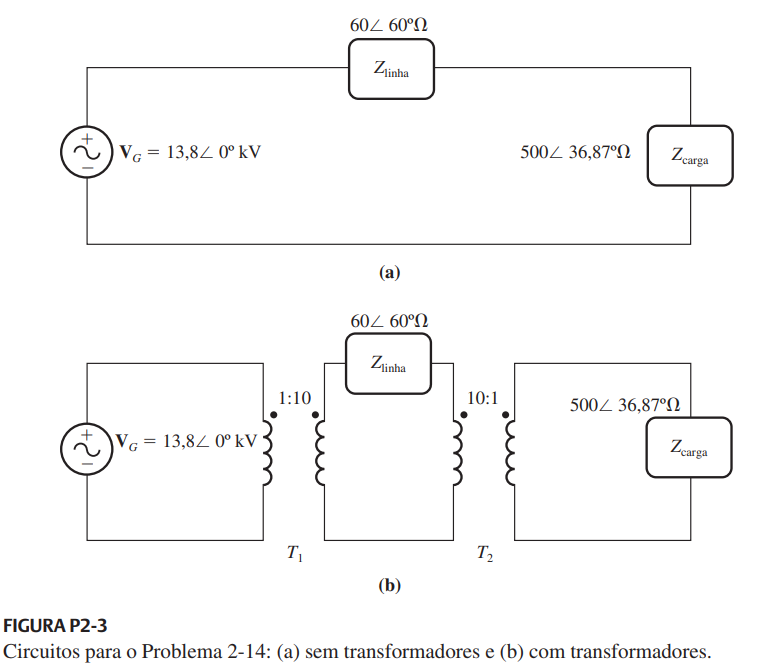

**a-** Se o gerador for ligado diretamente à carga (Figura P2-3a), qual será a razão entre a tensão da carga e a tensão gerada? Quais são as perdas de transmissão do sistema?

**b-** Que porcentagem da potência fornecida pela fonte chega até a carga (qual é a eficiência do sistema de transmissão)?

**c-** Se um transformador elevador de 1:10 for colocado na saída do gerador e um transformador abaixador de 10:1 for colocado no lado da carga da linha de transmissão, qual será a nova razão entre a tensão da carga e a tensão gerada? Quais são as perdas de transmissão do sistema agora? (Nota: Pode-se assumir que os transformadores são ideais.)

**d-** Que porcentagem da potência fornecida pela fonte chega até a carga agora?

**e-** Compare as eficiências do sistema de transmissão com e sem transformadores.



In [ ]:
import numpy as np

V = 13800
Zcarga = 400.00+300.00j
Zlinha = 30.00 + 51.96j # usando conversão de coordenada polar para coordenada cartesiana


Ilinha =  (V)/(Zcarga+Zlinha)
print(Ilinha)
# ILINHA É Magnitude: 24.83 Ângulo: -39.30° -> usando conversao de coordenadas
Vcarga = Ilinha*Zcarga # Ilinha é igual Icarga

razao = abs(Vcarga)/V
print(f"essa é a razao entre tensão da carga e tensão gerada ({razao:.3f})")

# 📌 Definição do ângulo
angulo_graus = 60  # Ângulo em graus

# 📌 Conversão para radianos
angulo_radianos = np.radians(angulo_graus)

# 📌 Cálculo de Rcarga
Rcarga = 500 * np.cos(angulo_radianos) # esse 500 é a magnitude do Zcarga que é esta no exercicio acima

Pcarga = (24.83**2)*Rcarga # esse valor é o Ilinha definido la encima talvez poderia dar certo usando abs(Ilinha)
Rlinha = 60 * np.cos(angulo_radianos) # esse 60 é o valor
Perdas = (24.83**2)*(Rlinha)
Pentrada = Pcarga + Perdas
n = ((Pcarga)/(Pentrada))*100
print(f"a eficiencia vai ser ({n:.3f})%")
print("---------------------------------------------------------")
print("LETRA C")
a = 0.1
Zlinharef = (a**2)*(Zlinha)
Ilinharef = (V)/(Zlinharef + Zcarga)

modulo = abs(Ilinharef)  # Módulo
angulo = np.angle(Ilinharef, deg=True)  # Ângulo em graus

# 📌 Exibir os resultados

print(f"Ilinharef em coordenada polar: ({modulo:.4f}) / ∠ {angulo:.2f}°")

Vcarga = Ilinharef*Zcarga
modulov = abs(Vcarga)
angulov = np.angle(Vcarga, deg=True)
print(f" o valor em Vcarga de coordenada polar é  ({modulov:.4f}) / ∠ {angulov:.2f}°")

Rcarga = 500*np.cos(angulo_radianos)
Pcarga = (modulo**2)*(Rcarga)

razaoB = modulov/V
print(f"a razaão de tensão nova é ({razaoB:.4f})")
Ilinha = a*modulo
Perdas = (Ilinha**2)*(Rlinha)
print(f"as perdas são Pcarga = {Pcarga:.2f} W e Perdas da linha {Perdas:.2f} W")
eficiencia = (Pcarga)/(Pcarga+Perdas)
eficiencia1 = eficiencia*100
print(f"a eficiencia vai ser {eficiencia1:.2f} %")
print("As perdas de transmissão diminuíram por um fator de mais de 80 quando os transformadores foram adicionados ao sistema.")


(19.217824714691023-15.73001299205268j)
essa é a razao entre tensão da carga e tensão gerada (0.900)
a eficiencia vai ser (89.286)%
---------------------------------------------------------
LETRA C
Ilinharef em coordenada polar: (27.5696) / ∠ -36.90°
 o valor em Vcarga de coordenada polar é  (13784.7867) / ∠ -0.03°
a razaão de tensão nova é (0.9989)
as perdas são Pcarga = 190020.34 W e Perdas da linha 228.02 W
a eficiencia vai ser 99.88 %
As perdas de transmissão diminuíram por um fator de mais de 80 quando os transformadores foram adicionados ao sistema.


# Exercicio 2.15

Um autotransformador é utilizado para conectar uma linha de distribuição de 12,6 kV a uma outra linha de distribuição de 13,8 kV. Ele deve ser capaz de operar com 2000 kVA. Há três fases, ligadas em Y–Y com seus neutros solidamente aterrados

**a-** Qual deve ser relação de espiras Nc/Nse para obter essa conexão?

**b-**  Com quanta potência aparente devem operar os enrolamentos de cada autotransformador?

**c-** Qual é a vantagem de potência desse sistema com autotransformador?

**d-** Se um dos autotransformadores fosse religado como um transformador comum,
quais seriam suas especificações nominais?


In [ ]:
import numpy as np
r3 = np.sqrt(3)
Valta = 13800/r3
Vbaixa = 12600/r3
#Relação de espiras é Valta/Vbaixa = ((Nc+Nse)/(Nc))
#logo b = Nc/Nse
b = 12.6/1.2
print(f"a relação de espiras é {b}")
print("--------------------------------------------")
print("LETRA B")
# A FORMULA É (Sio)/(Sw) = (Nc+Nse)/(Nc)
# c = Sio/Sw = 11.5 -> fazendo Nse = 10.5Nc
c = 11.5
S = 2000e3
Sw = (S)/(3*b) #motivo do 3 é para cada fase do transformador
print(f"a potência aparente é {Sw:.2f} VA")
print("--------------------------------------------")
print("LETRA C")
print(f"a letra b diz que a vantagem de utilizar esse sistema é {c}")
print("--------------------------------------------")
print("LETRA D")
VfaseA = 13800/r3
VfaseB = 12600/r3

Nc = VfaseB
NSE = VfaseA -VfaseB
print(f" uma unica fase do autotransformador vai ser do tipo {Nc:.2f}/{NSE:.2f} V e com com {Sw:.2f} kVA")


a relação de espiras é 10.5
--------------------------------------------
LETRA B
a potência aparente é 63492.06 VA
--------------------------------------------
LETRA C
a letra b diz que a vantagem de utilizar esse sistema é 11.5
--------------------------------------------
LETRA D
 uma unica fase do autotransformador vai ser do tipo 7274.61/692.82 V e com com 63492.06 kVA


# Exercicio 2.16

 Prove a seguinte afirmação: se um transformador, com uma impedância em série Zeq, for ligado como autotransformador, sua impedância em série Z'eq por unidade, como autotransformador, será
 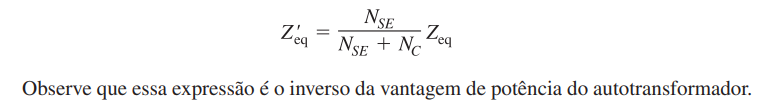


In [ ]:
# Zeq = Z1 + [((NC)/(NSE))² * z2] (1)
# Vlinha = Ic*Zeq (2)
# Ilinha = IC + ISE = IC + (NC/NSE)*IC -> ((NSE+NC)(NSE))*IC
# IC = ((NSE+NC)(NSE))*Ilinha (3)
#  A equação (3) em (2) ficara
# Vlinha =  [((NSE+NC)(NSE))*Ilinha]*Zeq
# Como Zeq = Vlinha/Ilinha , logo
# Zeq_referido = Vlinha/Ilinha -> Zeq_referido = [((NSE+NC)(NSE))*Zeq]

# Exercicio 2.17

Um transformador convencional de 10 kVA e 480/120 V deve ser usado para alimentar uma carga de 120 V, a partir de uma fonte de 600 V. Considere que o transformador é ideal e assuma que a isolação pode suportar 600 V.

**a-** Em relação às ligações do transformador, faça um desenho da configuração que será capaz de realizar o trabalho requerido.

**b-** Encontre os quilovolts-ampères nominais do transformador da configuração.

**c-** Encontre as correntes máximas do primário e do secundário nessas condições.



In [ ]:
Sw = 10e3
Vp = 480
Vs = 120
Vfonte = 600
print("LETRA A")
#NSE = 4*NC
NSE = 4*120
print(f"o NSE vai ter um valor de {NSE} V igual Vp  e logo NSE = 480 e NC 120 -> resulta na  tensão da Vfonte de 600 V")
print("--------------------------------------------------------")
print("LETRA B")
#SIO = ({NSE+NC}*Sw)/(NSE)
#Se o NSE = 4NC , a equação fica
NC = 120
SIO = (((5*NC)*Sw)/(4*NC))
print(f" o valor de SIO kVA classificação vai ser  igual a {SIO} kVA")
print("-------------------------------------------------------")
print("LETRA C")
Ip = SIO/Vfonte # ali seria o VP, mas como o Vp agora é o Vfonte que esta sendo utilizado
print(f" a corrente maxima do primario é igual {Ip:.2f} A")
Is = SIO/Vs # ali seria o VP, mas como o Vp agora é o Vfonte que esta sendo utilizado
print(f" a corrente maxima do secundario é igual {Is:.2f} A")

LETRA A
o NSE vai ter um valor de 480 V igual Vp  e logo NSE = 480 e NC 120 -> resulta na  tensão da Vfonte de 600 V
--------------------------------------------------------
LETRA B
 o valor de SIO kVA classificação vai ser  igual a 12500.0 kVA
-------------------------------------------------------
LETRA C
 a corrente maxima do primario é igual 20.83 A
 a corrente maxima do secundario é igual 104.17 A


# Exercicio 2.18

Um transformador convencional de 10 kVA e 480/120 V deve ser utilizado para alimentar uma carga de 480 V, a partir de uma fonte de 600 V. Considere o transformador como ideal e assuma que a isolação pode suportar 600 V.

**a-** Em relação às ligações do transformador, faça um desenho da configuração que será capaz de realizar o trabalho requerido.

**b-** Encontre os quilovolts-ampères nominais do transformador da configuração.

**c-** Encontre as correntes máximas do primário e do secundário nessas condições.

**d-** O transformador do Problema 2-18 é idêntico ao transformador do Problema 2-17, mas há uma diferença significativa na capacidade do transformador para lidar com potência aparente nas duas situações. Por quê? O que isso diz a respeito das condições ótimas para usar um autotransformador?


In [ ]:
Sw = 10e3
Vp = 480
Vs = 120
Vfonte = 600

#Esse Exercicio agora é ao contrario do anterior, ou seja, o NC = 4NSE -> RESPOSTA DA LETRA A
NC = 480
NSE = 120

SIO = (((5*NSE)*Sw)/(NSE))
print("letra B")
print(f" o quilovolts-amperes vai ser igual a SIO={SIO:.2f} kVA")
print("--------------------------------------------------------")
print("LETRA C")
Ip = SIO/Vfonte # o Vp que seria 480 agora virou o Vfonte de 600 V
print(f" a corrente maxima do primario é igual {Ip:.2f} A")
Is = SIO/Vp # O vs acabou virando o Vp sendo igual a 480  V
print(f" a corrente maxima do secundario é igual {Is:.2f} A")
print("---------------------------------------------------")
print("LETRA D")
import pandas as pd

# 📌 Criando a tabela comparativa
dados = {
    "Característica": [
        "Potência aparente",
        "Corrente máxima do primário",
        "Corrente máxima do secundário",
        "Transferência de potência",
        "Isolação entre enrolamentos"
    ],
    "Transformador Convencional (2-17)": [
        "12500 kVA",
        "20.83 A",
        "104.17 A",
        "Via enrolamentos",
        "Alta isolação"
    ],
    "Autotransformador (2-18)": [
        "50000 kVA",
        "83.33 A",
        "104.17 A",
        "Parte transferida diretamente",
        "Menos isolação"
    ]
}

df = pd.DataFrame(dados)

# 📌 Exibir a tabela
print("\n🔎 Comparação entre Transformador Convencional (2-17) e Autotransformador (2-18)\n")
print(df.to_string(index=False))

# 📌 Explicação da diferença
explicacao = """
A diferença significativa na capacidade dos transformadores ocorre porque o autotransformador (2-18)
permite que parte da energia seja transferida diretamente, sem passar por todo o enrolamento.

Isso aumenta a potência aparente que o transformador pode lidar, reduz perdas e melhora a eficiência.
No entanto, o autotransformador possui menos isolamento entre o primário e o secundário, o que pode ser
uma limitação dependendo da aplicação.

✅ Condições ótimas para uso de autotransformador:
1️⃣ Quando há necessidade de alta potência aparente.
2️⃣ Quando a isolação entre primário e secundário não é um problema.
3️⃣ Quando a eficiência e custo menor são desejáveis.
"""

# 📌 Exibir explicação
print("\n📖 Explicação:")
print(explicacao)

letra B
 o quilovolts-amperes vai ser igual a SIO=50000.00 kVA
--------------------------------------------------------
LETRA C
 a corrente maxima do primario é igual 83.33 A
 a corrente maxima do secundario é igual 104.17 A
---------------------------------------------------
LETRA D

🔎 Comparação entre Transformador Convencional (2-17) e Autotransformador (2-18)

               Característica Transformador Convencional (2-17)      Autotransformador (2-18)
            Potência aparente                         12500 kVA                     50000 kVA
  Corrente máxima do primário                           20.83 A                       83.33 A
Corrente máxima do secundário                          104.17 A                      104.17 A
    Transferência de potência                  Via enrolamentos Parte transferida diretamente
  Isolação entre enrolamentos                     Alta isolação                Menos isolação

📖 Explicação:

A diferença significativa na capacidade dos transform

# Exercicio 2.19

Duas fases de uma linha de distribuição trifásica de 14,4 kV atendem uma estrada rural remota (o neutro também está disponível). Um fazendeiro nessa estrada tem um alimentador de 480 V que abastece cargas trifásicas de 200 kW, FP 0,85 atrasado, e também cargas monofásicas de 60 kW, FP 0,9 atrasado. As cargas monofásicas estão distribuídas de forma equilibrada entre as três fases. Assumindo que uma ligação (Y aberta – Delta aberto) é usada para fornecer potência a essa fazenda, encontre as tensões e as correntes em cada
um dos dois transformadores. Encontre também a potência ativa e a reativa fornecidas por cada transformador. Assuma que os transformadores são ideais. Qual é a especificação nominal mínima de kVA requerida de cada transformador?


In [ ]:

import numpy as np

# 📌 Dados iniciais
Vlinha_primario = 14.4e3  # Tensão de linha primária (V)
Vlinha_secundario = 480  # Tensão de linha secundária (V)
P_trifasico = 200e3  # Potência ativa trifásica (W)
fp_trifasico = 0.85  # Fator de potência trifásico (atrasado)
P_monofasico = 60e3  # Potência ativa monofásica (W)
fp_monofasico = 0.9  # Fator de potência monofásico (atrasado)
r3 = np.sqrt(3)  # Raiz de 3

# 📌 Cálculo da potência reativa das cargas
Q_trifasico = P_trifasico * np.tan(np.arccos(fp_trifasico))  # Potência reativa trifásica
Q_monofasico = P_monofasico * np.tan(np.arccos(fp_monofasico))  # Potência reativa monofásica

# 📌 Potência total da fazenda
P_total = P_trifasico + P_monofasico
Q_total = Q_trifasico + Q_monofasico
S_total = np.sqrt(P_total**2 + Q_total**2)  # Potência aparente total

# 📌 Corrente de carga no secundário
Ilinha_secundario = S_total / (r3 * Vlinha_secundario)

# 📌 Corrente no primário usando relação de espiras
relacao_espiras = Vlinha_primario / Vlinha_secundario
Ilinha_primario = Ilinha_secundario / relacao_espiras

# 📌 Especificação mínima de kVA por transformador (considerando Y aberto – Delta aberto)
S_por_transformador = S_total / 2  # Cada transformador suporta metade da potência aparente

# 📌 Exibição dos resultados
print(f"Potência ativa total: {P_total:.2f} W")
print(f"Potência reativa total: {Q_total:.2f} VAR")
print(f"Potência aparente total: {S_total:.2f} VA")
print(f"Corrente de linha no secundário: {Ilinha_secundario:.2f} A")
print(f"Corrente de linha no primário: {Ilinha_primario:.2f} A")
print(f"Especificação mínima de cada transformador: {S_por_transformador:.2f} kVA")


Potência ativa total: 260000.00 W
Potência reativa total: 153008.19 VAR
Potência aparente total: 301681.14 VA
Corrente de linha no secundário: 362.87 A
Corrente de linha no primário: 12.10 A
Especificação mínima de cada transformador: 150840.57 kVA


# Exercicio 2.20

Um transformador de distribuição monofásico de 50 kVA, 20.000/480 V e 60 Hz é submetido a ensaios com os seguintes resultados:
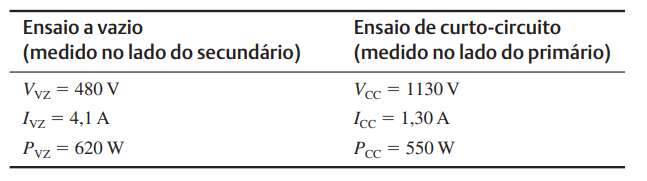

**a-** Encontre o circuito equivalente por unidade desse transformador em 60 Hz.

**b-** Qual é a eficiência do transformador em condições nominais e fator de potência unitário? Qual é a regulação de tensão nessas condições?

**c-** Quais seriam as especificações nominais desse transformador se ele operasse em um sistema de potência de 50 Hz?

**d-** Faça o desenho esquemático do circuito equivalente desse transformador, referido ao lado primário, se ele estiver operando em 50 Hz.

**e-** Qual é a eficiência do transformador nas condições nominais, em um sistema de potência de 50 Hz com fator de potência unitário? Qual é a regulação de tensão nessas condições?

**f-** Como a eficiência de um transformador nas condições nominais e 60 Hz pode ser comparada com a eficiência do mesmo transformador operando em 50 Hz?




In [ ]:
import numpy as np

S = 50e3
Vp = 20e3
Vs = 480
frequencia = 60

#----------------ENSAIO A VAZIO------------------------------------
Vvz = 480
Ivz = 4.1
Pvz = 620
#----------------ENSAIO DE CURTO CIRCUITO------------------------------------
Vcc = 1130
Icc = 1.30
Pcc = 550
#-----------------------------------------------------
ZbaseP = (Vp**2)/(S)
ZbaseS = (Vs**2)/(S)

Yex = Ivz/Vvz #magnitude
fp =  ((Pvz)/(Vvz*Ivz))

angulo_radianos = -np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Conversão
print(f"o valor de Yex em coordenada polar é {Yex:.5f}/_ {angulo_graus:.5f}° ")
Yex_cart = 0.0027 -0.0081j # converti coordenada polar para cartesiana
Gc = 0.0027
Bm = -0.0081j
Rc = 1/Gc
Xm = 1/Bm
Rc_pu = (Rc)/(ZbaseS)
Xm_pu = (Xm)/(ZbaseS)
print(f"os valores em pu de Rc -> {Rc_pu:.2f} e Xm ->{Xm_pu:.2f}")
print("agora é a segunda parte do ensaio")
Zeq = Vcc/Icc
fp =((Pcc)/(Vcc*Icc))

angulo_radianos = np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Conversão
print(f"o valor de Zeq em coordenada polar é {Zeq:.2f}/_ {angulo_graus:.2f}° ")
Zeq =  325.48+805.99j # Converti coordenada polar para cartesiana
Req_pu = (325.48)/(ZbaseP)
Xeq_pu = (805.99j)/(ZbaseP)
print(f"os valores em pu de Req -> {Req_pu:.3f} e Xeq ->{Xeq_pu:.3f}")
print("---------------------------------------------------------------")
print("LETRA B")
Zeq_pu = Req_pu + Xeq_pu
Vs = 1
Is = 1
Vp = Vs +((Zeq_pu)*(Is)) # o exercicio define Vs = 1 e  o Is tambem, ele tem o fator de potencia unitario, ou seja, é fasor 0°
modulo_Vp = abs(Vp)  # Módulo
angulo_Vp = np.angle(Vp, deg=True)  # Ângulo em graus

# 📌 Exibição dos resultados
print(f"Vp em coordenada cartesiana: {Vp.real:.4f} + j{Vp.imag:.4f}")
print(f"Vp em coordenada polar: ({modulo_Vp:.4f}) / ∠ {angulo_Vp:.2f}°")

Per_puReq = 1*Req_pu # corrente é igual 1, logo 1² = 1

Per_puRc  = (modulo_Vp**2)/(Rc_pu)

Psaida = Vs*Is
Pentrada = Psaida+Per_puRc+Per_puReq
eficiencia = ((Psaida/Pentrada))*100
print(f"logo a eficiencia vai ser igual a {eficiencia:.2f}%")

VR = ((modulo_Vp-Vs)/(Vs))*100
print(f"a regulação de tensão vai ser igual a {VR:.2f}%")
print("-----------------------------------------------------------")
print("LETRA C")
f1 = 60
f2 = 50
f = f2/f1
Snovo = f*S
Vp = 20000
Vpnovo = f*Vp
Vs = 480
Vsnovo = f*Vs
print(f" as novas informações são S:{Snovo:.2f} VA ; Vp:{Vpnovo:.2f} V e Vs:{Vsnovo:.2f} V")
print("-----------------------------------------------------------")
print("LETRA D")
print("fazer os parametros ser referidos ao lado primario de 60 hz")
Rc = ZbaseP*Rc_pu
Xm = ZbaseP*Xm_pu
Zeq = ZbaseP*Zeq_pu


Xmnovo = f*Xm
Zeqnovo = f*Zeq
Rcnovo = f*Rc
print(f"os novos valores são Rc={Rcnovo:.2f}; Xm={Xmnovo:.2f} e Zeq={Zeqnovo:.2f}")
print("----------------------------------------------------")
print("LETRA E")
ZbasePnovo = ((Vpnovo**2)/(Snovo))

ZbaseSnovo = ((Vsnovo**2)/(Snovo))

Rcnovo = Rc/ZbasePnovo
Xmnovo = Xm/ZbasePnovo

Zeqnovo = Zeq/ZbasePnovo

Vpnovo2 = 1 + (1*Zeqnovo) # denovo consideramos o Vs e Is igual 1/fasor 0°
modulo_Vp1 = abs(Vpnovo2)  # Módulo
angulo_Vp1 = np.angle(Vpnovo2, deg=True)  # Ângulo em graus

# 📌 Exibição dos resultados
print(f"Vp em coordenada cartesiana: {Vpnovo2.real:.4f} + j{Vpnovo2.imag:.4f} em pu")
print(f"Vp em coordenada polar: ({modulo_Vp1:.4f}) / ∠ {angulo_Vp1:.2f}° em pu")

Peqnovo = 1*Zeqnovo.real
Pcnovo = (modulo_Vp1**2)/(Rcnovo)
Pentrada1 = 1+Peqnovo+Pcnovo
eficiencia1 = ((1/Pentrada1))*100
print(f"logo a eficiencia vai ser igual a {eficiencia1:.2f}%")

VR2 = ((modulo_Vp1-1)/(1))*100
print(f"a regulação de tensão vai ser igual a {VR2:.2f}%")
print("-----------------------------------------------------------")
print("LETRA F")

import pandas as pd

# 📌 Criando tabela com resultados
dados = {
    "Parâmetro": [
        "Yex (polar)", "Rc (pu)", "Xm (pu)", "Zeq (polar)", "Req (pu)", "Xeq (pu)",
        "Vp (cartesiano)", "Vp (polar)", "Eficiência (%)", "Regulação de Tensão (%)",
        "S (VA)", "Vp (V)", "Vs (V)", "Rc (60 Hz)", "Xm (60 Hz)", "Zeq (60 Hz)",
        "Vp (cartesiano - 60 Hz)", "Vp (polar - 60 Hz)", "Eficiência (60 Hz)", "Regulação de Tensão (60 Hz)"
    ],
    "Valor": [
        "0.00854 / ∠ -71.63°", "80.38", "0.00 + 26.79j", "869.23 / ∠ 68.01°", "0.041", "0.000 + 0.101j",
        "1.0407 + j0.1007", "(1.0456) / ∠ 5.53°", "94.85%", "4.56%",
        "41666.67", "16666.67", "400.00", "535836.76", "0.00 + 178612.25j", "271.23 + 671.66j",
        "1.0488 + j0.1209", "(1.0558) / ∠ 6.58°", "94.31%", "5.58%"
    ]
}

df = pd.DataFrame(dados)

# 📌 Exibir a tabela
print("\n🔎 Resultados dos cálculos\n")
print(df.to_string(index=False))

# 📌 Explicação sobre eficiência do transformador em 50 Hz vs 60 Hz
explicacao = """
A eficiência do transformador em 50 Hz é quase igual à eficiência em 60 Hz (apenas ligeiramente menor),
mas a potência aparente do transformador em 50 Hz deve ser reduzida em relação à potência em 60 Hz pela razão 50/60.

Isso significa que, embora a eficiência se mantenha próxima, a capacidade de **manipulação de potência** é reduzida
ao operar o transformador em uma frequência mais baixa.

🔎 Comparação:
- **Eficiência do transformador a 60 Hz**: 94.85%
- **Eficiência do transformador a 50 Hz**: 94.31%
- **Regulação de tensão a 60 Hz**: 4.56%
- **Regulação de tensão a 50 Hz**: 5.58%

✅ Conclusão: A eficiência permanece **praticamente a mesma**, mas a **potência máxima suportada diminui** ao reduzir a frequência.
"""

# 📌 Exibir explicação
print("\n📖 Explicação:")
print(explicacao)


o valor de Yex em coordenada polar é 0.00854/_ -71.63673° 
os valores em pu de Rc -> 80.38 e Xm ->0.00+26.79j
agora é a segunda parte do ensaio
o valor de Zeq em coordenada polar é 869.23/_ 68.01° 
os valores em pu de Req -> 0.041 e Xeq ->0.000+0.101j
---------------------------------------------------------------
LETRA B
Vp em coordenada cartesiana: 1.0407 + j0.1007
Vp em coordenada polar: (1.0456) / ∠ 5.53°
logo a eficiencia vai ser igual a 94.85%
a regulação de tensão vai ser igual a 4.56%
-----------------------------------------------------------
LETRA C
 as novas informações são S:41666.67 VA ; Vp:16666.67 V e Vs:400.00 V
-----------------------------------------------------------
LETRA D
fazer os parametros ser referidos ao lado primario de 60 hz
os novos valores são Rc=535836.76; Xm=0.00+178612.25j e Zeq=271.23+671.66j
----------------------------------------------------
LETRA E
Vp em coordenada cartesiana: 1.0488 + j0.1209 em pu
Vp em coordenada polar: (1.0558) / ∠ 6.58° em pu

# Exercicio 2.21

Prove que o sistema trifásico de tensões do secundário do transformador Y–Delta	, mostrado na Figura 2-37b, está atrasado de 30° em relação ao sistema trifásico de tensões do primário do transformador.
Essa figura é :

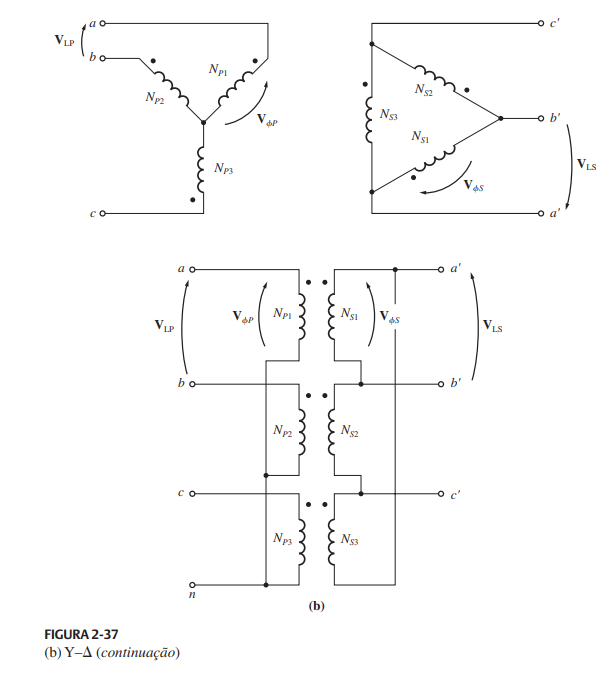

In [ ]:
import numpy as np

# 📌 Definição das tensões de fase no primário (Delta)
Vph_PA = 1 * np.exp(1j * np.radians(0))     # V_PA = 1∠0°
Vph_PB = 1 * np.exp(1j * np.radians(-120))  # V_PB = 1∠-120°
Vph_PC = 1 * np.exp(1j * np.radians(120))   # V_PC = 1∠120°

# 📌 Definição das tensões de fase no secundário (Y)
Vph_SA = Vph_PA                            # V_SA = 1∠0°
Vph_SB = Vph_PB                            # V_SB = 1∠-120°
Vph_SC = Vph_PC                            # V_SC = 1∠120°

# 📌 Cálculo das tensões de linha no primário (Delta)
Vab_P = Vph_PA - Vph_PB  # Vab = VA - VB
Vbc_P = Vph_PB - Vph_PC  # Vbc = VB - VC
Vca_P = Vph_PC - Vph_PA  # Vca = VC - VA

# 📌 Cálculo das tensões de linha no secundário (Y)
a = np.exp(1j * np.radians(30))  # 1∠30°
Vab_S = (Vph_SA - Vph_SB) * a
Vbc_S = (Vph_SB - Vph_SC) * a
Vca_S = (Vph_SC - Vph_SA) * a

# 📌 Conversão para módulo e ângulo
def polar_form(V):
    return abs(V), np.angle(V, deg=True)

# 📌 Exibição dos resultados
print(f"Tensão de linha primário Vab_P: {polar_form(Vab_P)} (∠ {polar_form(Vab_P)[1]:.2f}°)")
print(f"Tensão de linha secundário Vab_S: {polar_form(Vab_S)} (∠ {polar_form(Vab_S)[1]:.2f}°)")

# 📌 Diferença de fase entre primário e secundário
atraso = polar_form(Vab_S)[1] - polar_form(Vab_P)[1]
print(f"Diferença de fase (atraso): {atraso:.2f}°")

Tensão de linha primário Vab_P: (np.float64(1.7320508075688772), np.float64(30.000000000000004)) (∠ 30.00°)
Tensão de linha secundário Vab_S: (np.float64(1.7320508075688772), np.float64(60.00000000000001)) (∠ 60.00°)
Diferença de fase (atraso): 30.00°


# Exercicio 2.22

Prove que o sistema trifásico de tensões no secundário do transformador Delta–Y, mostrado na Figura 2-37c, está atrasado de 30° em relação ao sistema trifásico de tensões do primário do transformador.
Essa figura esta aqui embaixo:

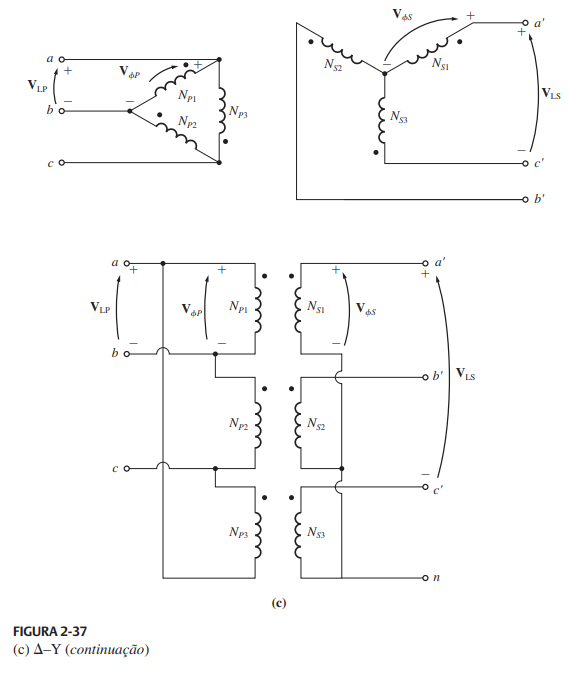

In [ ]:
import numpy as np

# 📌 Definição das tensões de fase no primário (Y)
Vph_PA = 1 * np.exp(1j * np.radians(0))     # V_PA = 1∠0°
Vph_PB = 1 * np.exp(1j * np.radians(-120))  # V_PB = 1∠-120°
Vph_PC = 1 * np.exp(1j * np.radians(120))   # V_PC = 1∠120°

# 📌 Cálculo das tensões de linha no primário (Y)
Vab_P = Vph_PA - Vph_PB  # Vab no primário
Vbc_P = Vph_PB - Vph_PC  # Vbc no primário
Vca_P = Vph_PC - Vph_PA  # Vca no primário

# 📌 Definição da relação de transformação para Y-Delta (multiplicar por 1∠-30°)
a_inv = np.exp(-1j * np.radians(30))  # Relação Y-Delta (-30°)

# 📌 Cálculo das tensões de linha no secundário (Delta)
Vab_S = Vab_P * a_inv
Vbc_S = Vbc_P * a_inv
Vca_S = Vca_P * a_inv

# 📌 Conversão para módulo e ângulo
def polar_form(V):
    return abs(V), np.angle(V, deg=True)

# 📌 Exibição dos resultados
print(f"Tensão de linha primário Vab_P: {polar_form(Vab_P)} (∠ {polar_form(Vab_P)[1]:.2f}°)")
print(f"Tensão de linha secundário Vab_S: {polar_form(Vab_S)} (∠ {polar_form(Vab_S)[1]:.2f}°)")

# 📌 Diferença de fase entre primário e secundário
atraso = polar_form(Vab_S)[1] - polar_form(Vab_P)[1]
print(f"Diferença de fase (atraso): {atraso:.2f}°")

Tensão de linha primário Vab_P: (np.float64(1.7320508075688772), np.float64(30.000000000000004)) (∠ 30.00°)
Tensão de linha secundário Vab_S: (np.float64(1.7320508075688772), np.float64(1.1017764609091715e-14)) (∠ 0.00°)
Diferença de fase (atraso): -30.00°


# Exercicio 2.23

Um transformador monofásico de 10 kVA e 480/120 V deve ser usado como autotransformador ligando uma linha de distribuição de 600 V a uma carga de 480 V. Quando ele é submetido a ensaios como transformador convencional, os seguintes valores são medidos no lado primário (480 V) do transformador:

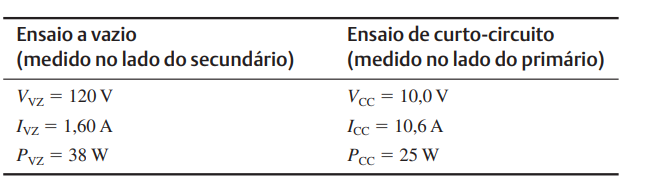

**a-** Encontre o circuito equivalente por unidade desse transformador quando ele é ligado de modo convencional. Qual é a eficiência do transformador em condições nominais e fator de potência unitário? Qual é a regulação de tensão nessas condições?

**b-** Faça um desenho esquemático das ligações, quando ele é usado como um autotransformador abaixador de 600/480 V.

**c-** Qual é a especificação nominal em quilovolts-ampères do transformador quando ele está ligado como autotransformador?

**d-** Responda às questões de (a) para o caso de ligação como autotransformador

In [ ]:
import numpy as np
S = 10e3
Vp = 480
Vs = 120
Vfonte = 600

Vvz = 120
Ivz = 1.6
Pvz = 38

Vcc = 10
Icc = 10.6
Pcc = 25

ZbaseP = (Vp**2)/(S)
ZbaseS = (Vs**2)/(S)

Yex = Ivz/Vvz #magnitude
fp =  ((Pvz)/(Vvz*Ivz))

angulo_radianos = -np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Conversão
print(f"o valor de Yex em coordenada polar é {Yex:.5f}/_ {angulo_graus:.5f}° ")
Yex_cart = 0.002635 -0.01307j
Gc = 0.002635
Bm = -0.01307j
Rc = 1/Gc
Xm = 1/Bm

Rc_pu = (Rc)/(ZbaseS)
Xm_pu = (Xm)/(ZbaseS)
print(f"os valores em pu de Rc -> {Rc_pu:.2f} e Xm ->{Xm_pu:.2f}")
print("agora é a segunda parte do ensaio")
Zeq = Vcc/Icc
fp =((Pcc)/(Vcc*Icc))

angulo_radianos = np.arccos(fp)  # Ângulo em radianos
angulo_graus = np.degrees(angulo_radianos)  # Conversão
print(f"o valor de Zeq em coordenada polar é {Zeq:.2f}/_ {angulo_graus:.2f}° ")
Zeq =  0.222+0.917j # Converti coordenada polar para cartesiana
Req_pu = (0.222)/(ZbaseP)
Xeq_pu = (0.917j)/(ZbaseP)
print(f"os valores em pu de Req -> {Req_pu:.5f} e Xeq ->{Xeq_pu:.5f}")
print("---------------------------------------------------------------")
Zeq_pu = Req_pu + Xeq_pu
Vs = 1
Is = 1
Vp = Vs +((Zeq_pu)*(Is)) # o exercicio define Vs = 1 e  o Is tambem, ele tem o fator de potencia unitario, ou seja, é fasor 0°
modulo_Vp = abs(Vp)  # Módulo
angulo_Vp = np.angle(Vp, deg=True)  # Ângulo em graus

# 📌 Exibição dos resultados
print(f"Vp em coordenada cartesiana: {Vp.real:.4f} + j{Vp.imag:.4f}")
print(f"Vp em coordenada polar: ({modulo_Vp:.4f}) / ∠ {angulo_Vp:.2f}°")

Per_puReq = 1*Req_pu # corrente é igual 1, logo 1² = 1

Per_puRc  = (modulo_Vp**2)/(Rc_pu)

Psaida = Vs*Is
Pentrada = Psaida+Per_puRc+Per_puReq
eficiencia = ((Psaida/Pentrada))*100
print(f"logo a eficiencia vai ser igual a {eficiencia:.2f}%")

VR = ((modulo_Vp-Vs)/(Vs))*100
print(f"a regulação de tensão vai ser igual a {VR:.2f}%")
print("-----------------------------------------------------------")
print("Letra B")
print("no futuro faço desenho")
print("-----------------------------------------------------------")
print("Letra C")
NC = 4
NSE = 1
Sw = 10e3
SIO = ((NC+NSE)/(NSE))*Sw
print(f"esse é a especificação de potencia nominal {SIO:.2f} VA")
print("-----------------------------------------------------------")
print("Letra D")

Req = Req_pu/5
Xeq = Xeq_pu/5

Zeqnovo = Req+Xeq

Vp = 1 + (1*Zeqnovo)
modulo_Vp = abs(Vp)  # Módulo
angulo_Vp = np.angle(Vp, deg=True)  # Ângulo em graus
print(f"Vp em coordenada cartesiana: {Vp.real:.4f} + j{Vp.imag:.4f}")
print(f"Vp em coordenada polar: ({modulo_Vp:.4f}) / ∠ {angulo_Vp:.2f}°")

Pnucleo = (modulo_Vp**2)/(Rc_pu)



Pentrada = 1 + Pnucleo + Pcu
eficiencia = ((1/Pentrada))*100
print(f"logo a eficiencia vai ser igual a {eficiencia:.3f}%")

VR = ((modulo_Vp-1)/(1))*100
print(f"a regulação de tensão vai ser igual a {VR:.2f}%")

o valor de Yex em coordenada polar é 0.01333/_ -78.58484° 
os valores em pu de Rc -> 263.55 e Xm ->0.00+53.13j
agora é a segunda parte do ensaio
o valor de Zeq em coordenada polar é 0.94/_ 76.36° 
os valores em pu de Req -> 0.00964 e Xeq ->0.00000+0.03980j
---------------------------------------------------------------
Vp em coordenada cartesiana: 1.0096 + j0.0398
Vp em coordenada polar: (1.0104) / ∠ 2.26°
logo a eficiencia vai ser igual a 98.67%
a regulação de tensão vai ser igual a 1.04%
-----------------------------------------------------------
Letra B
no futuro faço desenho
-----------------------------------------------------------
Letra C
esse é a especificação de potencia nominal 50000.00 VA
-----------------------------------------------------------
Letra D
Vp em coordenada cartesiana: 1.0019 + j0.0080
Vp em coordenada polar: (1.0020) / ∠ 0.46°
logo a eficiencia vai ser igual a 99.430%
a regulação de tensão vai ser igual a 0.20%



# Exercicio 2.24

A Figura P2-4 mostra um diagrama unifilar de um sistema de potência, que consiste em um gerador trifásico de 480 V e 60 Hz, o qual alimenta duas cargas por meio de uma linha de transmissão com um par de transformadores em suas extremidades. (NOTA: Os diagramas unifilares são descritos no Apêndice A, em que são analisados os circuitos de potência trifásicos.

 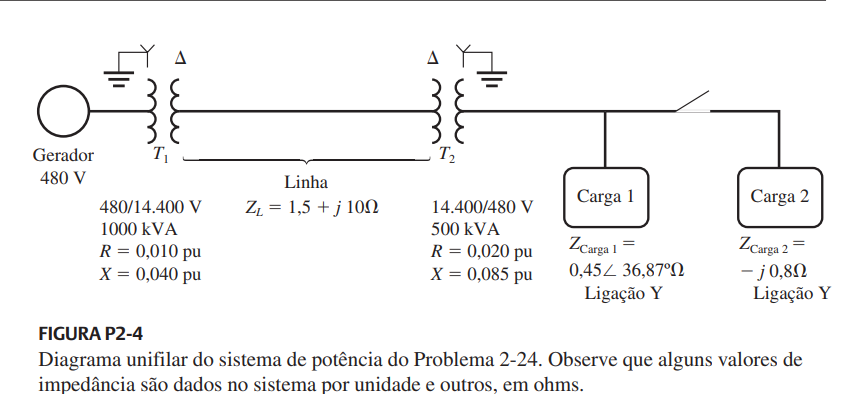

 **a-** Faça um desenho esquemático do circuito equivalente por fase desse sistema de potência

 **b-** Com a chave aberta, encontre a potência ativa P, a potência reativa Q e a potência aparente S fornecidas pelo gerador. Qual é o fator de potência do gerador?

 **c-** Com a chave fechada, encontre a potência ativa P, a potência reativa Q e a potência aparente S fornecidas pelo gerador. Qual é o fator de potência do gerador?

 **d-**Quais são as perdas de transmissão (perdas nos transformadores mais as perdas na linha) nesse sistema com a chave aberta? Com a chave fechada? Qual é o efeito de se acrescentar a Carga 2 ao sistema?

In [31]:
print("Nesse exercicio, o ideal é converter para unidade PU, e são 3 Regioes para converter")
print("o ideal é considerar um Sbase normal para todas regiões, porque facilita os calculos")
import cmath
import math
import numpy as np
Sbase1 = 1000e3
Vlbase1 = 480
Vf1 = 277

Sbase2 = 1000e3
Vlbase2 = 14400
Vf2 = 8314

Sbase3 = 1000e3
Vlbase3 = 480
Vf3 = 277

Zbase1 = (((3)*(Vf1**2))/(Sbase1))
Zbase2 = (((3)*(Vf2**2))/(Sbase2))
Zbase3 = (((3)*(Vf3**2))/(Sbase3))

print("Zbase1 = ",Zbase1, "ohm")
print("Zbase2 = ",Zbase2, "ohm")
print("Zbase3 = ",Zbase3, "ohm")

print("LETRA A")
R1pu = 0.01 #dado
X1pu = 0.04 #dado
S2 = 500e3
print("Agora é fazer as conversoes das regioes 2 e 3 para a base 1")
R2pu = 0.02* (((Vf2**2)*(Sbase1))/((Vf2**2)*(S2)))
X2pu = 0.085* (((Vf2**2)*(Sbase1))/((Vf2**2)*(S2)))

print("R2pu = ",R2pu,"pu")
print("X2pu = ",X2pu,"pu")

Zlinha = 1.5+10j
Zlinhapu = Zlinha/Zbase2
print(f" o Zlinha em pu vai ser igual a {Zlinhapu:.4f} em pu")

Zcarga = 0.36+0.27j # converti para coordenada cartesiana
Zcargapu = Zcarga/Zbase3
print(f" o Zcarga em pu vai ser igual a {Zcargapu:.4f} em pu")

Zcarga2 = -0.8j
Zcarga2pu = Zcarga2/Zbase3
print(f" o Zcarga2 em pu vai ser igual a {Zcarga2pu:.4f} em pu")

print("Agora é só fazer um circuito monofasico, lembrando que o Vp é igual 1/fasor 0° ")

print("----------------------------------------------------------------------------------")
print("LETRA B")
Zeq = R1pu + X1pu + R2pu + X2pu + Zlinhapu + Zcargapu
print(f" o Zeq em pu vai ser igual a {Zeq:.4f} em pu") # LEMBRETE , O CAPACITOR NAO ESTA LIGADO,
# 📌 Conversão para coordenada polar
modulo_Zeq = abs(Zeq)  # Módulo
angulo_Zeq = np.angle(Zeq, deg=True)  # Ângulo em graus

I = (1)/(Zeq)
V = I*Zcargapu  #v em pu da carga

# 📌 Função para conversão polar
def polar_form(Z):
    return abs(Z), np.angle(Z, deg=True)

# 📌 Exibição dos resultados
print(f"Zeq em coordenada cartesiana: {Zeq.real:.4f} + j{Zeq.imag:.4f}")
print(f"Zeq em coordenada polar: ({polar_form(Zeq)[0]:.4f}) / ∠ {polar_form(Zeq)[1]:.2f}° em pu")

print(f"I em coordenada cartesiana: {I.real:.4f} + j{I.imag:.4f}")
print(f"I em coordenada polar: ({polar_form(I)[0]:.4f}) / ∠ {polar_form(I)[1]:.2f}° em pu")

print(f"V em coordenada cartesiana: {V.real:.4f} + j{V.imag:.4f}")
print(f"V em coordenada polar: ({polar_form(V)[0]:.4f}) / ∠ {polar_form(V)[1]:.2f}° em pu")

Pcarga_pu = ((abs(I)**2))*(Zeq.real)

Pcargareal = Pcarga_pu*Sbase1
print(f"essa é a potencia fornecida a carga Pcarga = {Pcargareal:.2f} W")


Pgpu = 1*(abs(I)*np.cos(0.6434)) # isso aqui é  angulo V - I , no meu caso daria +37,9° no livro deu 41,6° , o motivo foi difenrença da corrente, mas esta tudo certo
Qgpu = 1*(abs(I)*np.sin(0.6434))
Sgpu = Pgpu + Qgpu
print(f"essa é a potencia fornecida ao gerador Pgpu = {Pgpu:.2f} W")
print(f"essa é a potencia fornecida ao gerador Qgpu = {Qgpu:.2f} var")
print(f"essa é a potencia fornecida ao gerador Sgpu = {Sgpu:.2f} var")

Pgreal = Pgpu*Sbase1
Qgreal = Qgpu*Sbase1
Sgreal = Sgpu*Sbase1
print(f"essa é a potencia fornecida ao gerador Pgreal = {Pgreal:.2f} W")
print(f"essa é a potencia fornecida ao gerador Qgreal = {Qgreal:.2f} var")
print(f"essa é a potencia fornecida ao gerador Sgreal = {Sgreal:.2f} var")


fp = np.cos(0.6434)
print(f"o fator de potencia do gerador é {fp:.2f}")

print("---------------------------------------------------")
print("LETRA C")
Zparalelo = (((Zcargapu)*(Zcarga2pu))/(Zcarga2pu+Zcargapu)) # LEMBRETE , O CAPACITOR ESTA LIGADO agora
print(f" o Zparalelo em pu vai ser igual a {Zparalelo:.4f} em pu")
Zeqpu = R1pu + X1pu + R2pu + X2pu + Zlinhapu + Zparalelo
print(f" o Zeqpu em pu vai ser igual a {Zeqpu:.4f} em pu")



I2 = (1)/(Zeqpu)
V2 = I2*Zparalelo  #v em pu da carga

# 📌 Função para conversão polar
def polar_form(K):
    return abs(K), np.angle(K, deg=True)

# 📌 Exibição dos resultados

print(f"I2 em coordenada cartesiana: {I2.real:.4f} + j{I2.imag:.4f}")
print(f"I2 em coordenada polar: ({polar_form(I2)[0]:.4f}) / ∠ {polar_form(I2)[1]:.2f}° em pu")

print(f"V2 em coordenada cartesiana: {V2.real:.4f} + j{V2.imag:.4f}")
print(f"V2 em coordenada polar: ({polar_form(V2)[0]:.4f}) / ∠ {polar_form(V2)[1]:.2f}° em pu")


Pcarga_pu2 = ((abs(I2)**2))*(Zparalelo.real)

Pcargareal2 = Pcarga_pu2*Sbase1
print(f"essa é a potencia fornecida a carga Pcarga = {Pcargareal2:.2f} W")

Pgpu2 = 1*(abs(I2)*np.cos(0.0500)) # isso aqui é  angulo V - I , no meu caso daria +2.8° no livro deu 6.0°
Qgpu2 = 1*(abs(I2)*np.sin(0.0500))
Sgpu2 = Pgpu2 + Qgpu2
print(f"essa é a potencia fornecida ao gerador Pgpu2 = {Pgpu2:.2f} W")
print(f"essa é a potencia fornecida ao gerador Qgpu2 = {Qgpu2:.2f} var")
print(f"essa é a potencia fornecida ao gerador Sgpu2 = {Sgpu2:.2f} var")

Pgreal2 = Pgpu2*Sbase1
Qgreal2 = Qgpu2*Sbase1
Sgreal2 = Sgpu2*Sbase1
print(f"essa é a potencia fornecida ao gerador Pgreal2 = {Pgreal2:.2f} W")
print(f"essa é a potencia fornecida ao gerador Qgreal2 = {Qgreal2:.2f} var")
print(f"essa é a potencia fornecida ao gerador Sgreal2 = {Sgreal2:.2f} var")

fp = np.cos(0.0500)
print(f"o fator de potencia do gerador é {fp:.5f}")
print("-----------------------------------------------------")
print("LETRA D")

Plinhapu = (abs(I)**2) * (Zlinhapu.real)
Plinhareal = Plinhapu*Sbase1
print(f"essa é a potencia fornecida pela linha Plinhareal = {Plinhareal:.2f} W")

Plinhapu2 = (abs(I2)**2) * (Zlinhapu.real)
Plinhareal2 = Plinhapu2*Sbase1
print(f"essa é a potencia fornecida pela linha Plinhareal2 = {Plinhareal2:.2f} W")
print("A Carga 2 melhorou o fator de potência do sistema, resultando em um aumento da tensão de carga e da potência total fornecida às cargas. "
      "Ao mesmo tempo, houve uma redução na corrente da linha de transmissão e nas perdas associadas. "
      "Este problema exemplifica bem as vantagens da correção do fator de potência em sistemas de energia.")


Nesse exercicio, o ideal é converter para unidade PU, e são 3 Regioes para converter
o ideal é considerar um Sbase normal para todas regiões, porque facilita os calculos
Zbase1 =  0.230187 ohm
Zbase2 =  207.367788 ohm
Zbase3 =  0.230187 ohm
LETRA A
Agora é fazer as conversoes das regioes 2 e 3 para a base 1
R2pu =  0.04 pu
X2pu =  0.17 pu
 o Zlinha em pu vai ser igual a 0.0072+0.0482j em pu
 o Zcarga em pu vai ser igual a 1.5639+1.1730j em pu
 o Zcarga2 em pu vai ser igual a -0.0000-3.4754j em pu
Agora é só fazer um circuito monofasico, lembrando que o Vp é igual 1/fasor 0° 
----------------------------------------------------------------------------------
LETRA B
 o Zeq em pu vai ser igual a 1.8312+1.2212j em pu
Zeq em coordenada cartesiana: 1.8312 + j1.2212
Zeq em coordenada polar: (2.2010) / ∠ 33.70° em pu
I em coordenada cartesiana: 0.3780 + j-0.2521
I em coordenada polar: (0.4543) / ∠ -33.70° em pu
V em coordenada cartesiana: 0.8868 + j0.0491
V em coordenada polar: (0.8882) / ∠ 3.